In [8]:
from keras.models import Sequential

In [9]:
from keras.layers import Dense

In [10]:
from keras.models import model_from_json

In [11]:
import numpy
import os
import warnings

In [12]:
seed=7
numpy.random.seed(seed)

In [13]:
dataset=numpy.loadtxt('pima-indians-diabetes.csv',delimiter=',')

In [14]:
X=dataset[:,0:8]
y=dataset[:,8]

In [15]:
model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))

In [16]:
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))

In [17]:
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit(X,y,epochs=150,batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 0.6762 - accuracy: 0.6432
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6497
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6471
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6510
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6836
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6693
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.6836
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7070
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.6940
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6927
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7682
Epoch 84/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7695
Epoch 85/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7669
Epoch 86/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7669
Epoch 87/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7643
Epoch 88/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7734
Epoch 89/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7786
Epoch 90/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7747
Epoch 91/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7695
Epoch 92/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7500
Epoch 93/150


In [20]:
scores=model.evaluate(X,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.7904


In [21]:
model_json=model.to_json()

In [22]:
with open('model.json','w') as json_file:
    json_file.write(model_json)

In [23]:
model.save_weights('model.h5')

In [24]:
print('saved model to disk')

saved model to disk


In [25]:
#now we load the saved model
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()

In [27]:
loaded_model=model_from_json(loaded_model_json)

In [28]:
loaded_model.load_weights('model.h5')

In [29]:
print('model loaded from disk')

model loaded from disk


In [30]:
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
loaded_model.evaluate(X,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.7904


[0.4542309045791626, 0.7903645634651184]

In [33]:
model_yaml=model.to_yaml()
with open('model.yaml','w') as yaml_file:
    yaml_file.write(model_yaml)
model.save_weights('model.h5')

In [34]:
print('model saved to disk')

model saved to disk


In [35]:
yaml_file=open('model.yaml','r')

In [36]:
loaded_model_yaml=yaml_file.read()

In [37]:
loaded_model2=model_from_yaml(loaded_model_yaml)

NameError: name 'model_from_yaml' is not defined

In [38]:
from keras.models import model_from_yaml

In [39]:
loaded_model2=model_from_yaml(loaded_model_yaml)

In [40]:
loaded_model2.load_weights('model.h5')

In [41]:
loaded_model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
loaded_model2.evaluate(X,y)

24/24 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7904


[0.4542309045791626, 0.7903645634651184]

In [43]:
from keras.callbacks import ModelCheckpoint

In [48]:
model=Sequential()
model.add(Dense(17,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
filepath='weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',save_best_only=True,node='max')

In [50]:
callbacks_list=[checkpoint]

In [51]:
##saves multiple weight distribution files
model.fit(X,y,validation_split=0.33,epochs=150,batch_size=10,callbacks=callbacks_list)

Epoch 1/150
52/52 [==============================] - 1s 7ms/step - loss: 0.6858 - accuracy: 0.6401 - val_loss: 0.6674 - val_accuracy: 0.6732
Epoch 2/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6401 - val_loss: 0.6558 - val_accuracy: 0.6732
Epoch 3/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.6440 - val_loss: 0.6484 - val_accuracy: 0.6693
Epoch 4/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.6479 - val_loss: 0.6436 - val_accuracy: 0.6575
Epoch 5/150
52/52 [==============================] - 0s 6ms/step - loss: 0.6377 - accuracy: 0.6479 - val_loss: 0.6297 - val_accuracy: 0.6693
Epoch 6/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.6556 - val_loss: 0.6226 - val_accuracy: 0.6693
Epoch 7/150
52/52 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.6673 - val_loss: 0.6231 - val_accuracy: 0.6693
Epoch 8/150
5

Epoch 59/150
52/52 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7276 - val_loss: 0.5609 - val_accuracy: 0.7126
Epoch 60/150
52/52 [==============================] - 0s 5ms/step - loss: 0.5594 - accuracy: 0.7276 - val_loss: 0.5592 - val_accuracy: 0.7205
Epoch 61/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7237 - val_loss: 0.5590 - val_accuracy: 0.7087
Epoch 62/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7160 - val_loss: 0.5578 - val_accuracy: 0.7126
Epoch 63/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7393 - val_loss: 0.5742 - val_accuracy: 0.7047
Epoch 64/150
52/52 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7257 - val_loss: 0.5701 - val_accuracy: 0.7047
Epoch 65/150
52/52 [==============================] - 0s 8ms/step - loss: 0.5516 - accuracy: 0.7490 - val_loss: 0.5591 - val_accuracy: 0.7126
Epoch 

In [52]:
model=Sequential()
model.add(Dense(17,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
filepath='weights.best.hdf5'
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',save_best_only=True,node='max')
callbacks_list=[checkpoint]

In [54]:
model.fit(X,y,validation_split=0.33,epochs=150,batch_size=10,callbacks=callbacks_list)

Epoch 1/150
52/52 [==============================] - 2s 24ms/step - loss: 0.6802 - accuracy: 0.6401 - val_loss: 0.6607 - val_accuracy: 0.6732
Epoch 2/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6401 - val_loss: 0.6614 - val_accuracy: 0.6732
Epoch 3/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6401 - val_loss: 0.6484 - val_accuracy: 0.6732
Epoch 4/150
52/52 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6420 - val_loss: 0.6408 - val_accuracy: 0.6614
Epoch 5/150
52/52 [==============================] - 1s 10ms/step - loss: 0.6394 - accuracy: 0.6459 - val_loss: 0.6334 - val_accuracy: 0.6614
Epoch 6/150
52/52 [==============================] - 0s 4ms/step - loss: 0.6270 - accuracy: 0.6537 - val_loss: 0.6273 - val_accuracy: 0.6732
Epoch 7/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.6556 - val_loss: 0.6200 - val_accuracy: 0.6693
Epoch 8/150

Epoch 59/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5633 - accuracy: 0.6965 - val_loss: 0.5806 - val_accuracy: 0.6732
Epoch 60/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.6829 - val_loss: 0.5771 - val_accuracy: 0.6929
Epoch 61/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.6751 - val_loss: 0.5747 - val_accuracy: 0.6850
Epoch 62/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.6732 - val_loss: 0.5811 - val_accuracy: 0.6732
Epoch 63/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.6848 - val_loss: 0.5787 - val_accuracy: 0.6929
Epoch 64/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.6751 - val_loss: 0.5766 - val_accuracy: 0.6929
Epoch 65/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.6926 - val_loss: 0.5698 - val_accuracy: 0.6850
Epoch 

In [55]:
###we clear and redefine the model here
model=Sequential()
model.add(Dense(17,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
model.load_weights('weights.best.hdf5')

In [57]:
model.evaluate(X,y)

24/24 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7161


[0.5146202445030212, 0.7161458134651184]

In [58]:
model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
history=model.fit(X,y,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
52/52 [==============================] - 1s 6ms/step - loss: 0.6849 - accuracy: 0.6342 - val_loss: 0.6687 - val_accuracy: 0.6732
Epoch 2/150
52/52 [==============================] - 0s 5ms/step - loss: 0.6694 - accuracy: 0.6342 - val_loss: 0.6539 - val_accuracy: 0.6732
Epoch 3/150
52/52 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.6342 - val_loss: 0.6511 - val_accuracy: 0.6732
Epoch 4/150
52/52 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.6401 - val_loss: 0.6474 - val_accuracy: 0.6890
Epoch 5/150
52/52 [==============================] - 0s 6ms/step - loss: 0.6469 - accuracy: 0.6576 - val_loss: 0.6439 - val_accuracy: 0.6850
Epoch 6/150
52/52 [==============================] - 0s 7ms/step - loss: 0.6466 - accuracy: 0.6556 - val_loss: 0.6263 - val_accuracy: 0.6732
Epoch 7/150
52/52 [==============================] - 1s 10ms/step - loss: 0.6394 - accuracy: 0.6498 - val_loss: 0.6162 - val_accuracy: 0.6732
Epoch 8/150


Epoch 59/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.7393 - val_loss: 0.5492 - val_accuracy: 0.7244
Epoch 60/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.7276 - val_loss: 0.5556 - val_accuracy: 0.7323
Epoch 61/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7198 - val_loss: 0.5481 - val_accuracy: 0.7244
Epoch 62/150
52/52 [==============================] - 0s 5ms/step - loss: 0.5443 - accuracy: 0.7335 - val_loss: 0.5439 - val_accuracy: 0.7323
Epoch 63/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7451 - val_loss: 0.5497 - val_accuracy: 0.7126
Epoch 64/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.7335 - val_loss: 0.5603 - val_accuracy: 0.7205
Epoch 65/150
52/52 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.7296 - val_loss: 0.5497 - val_accuracy: 0.7323
Epoch 

In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [61]:
import matplotlib.pyplot as plt

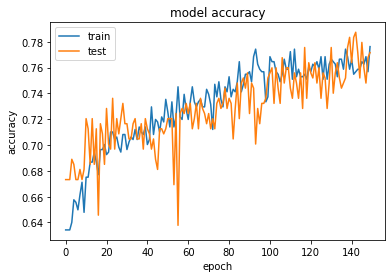

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

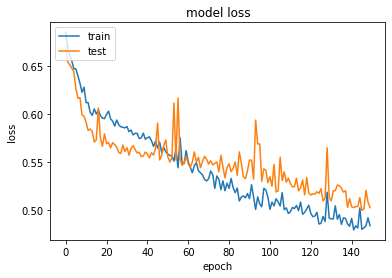

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [65]:
from sklearn.datasets import make_circles

In [66]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)

In [72]:
n_train=30
X_train, X_test=X[:n_train,:], X[n_train:,:]
y_train, y_test=y[:n_train],y[n_train:]

In [73]:
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4000)

Epoch 1/4000
1/1 [==============================] - 1s 775ms/step - loss: 0.6917 - accuracy: 0.4667 - val_loss: 0.6925 - val_accuracy: 0.5143
Epoch 2/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.6883 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.4857
Epoch 3/4000
1/1 [==============================] - 0s 59ms/step - loss: 0.6851 - accuracy: 0.5667 - val_loss: 0.6959 - val_accuracy: 0.4857
Epoch 4/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.6821 - accuracy: 0.5667 - val_loss: 0.6977 - val_accuracy: 0.4714
Epoch 5/4000
1/1 [==============================] - 0s 67ms/step - loss: 0.6792 - accuracy: 0.5667 - val_loss: 0.6996 - val_accuracy: 0.4857
Epoch 6/4000
1/1 [==============================] - 0s 57ms/step - loss: 0.6765 - accuracy: 0.6000 - val_loss: 0.7016 - val_accuracy: 0.4857
Epoch 7/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.6738 - accuracy: 0.6000 - val_loss: 0.7036 - val_accuracy: 0.4857
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 81ms/step - loss: 0.5987 - accuracy: 0.6667 - val_loss: 0.7613 - val_accuracy: 0.4714
Epoch 60/4000
1/1 [==============================] - 0s 65ms/step - loss: 0.5976 - accuracy: 0.6667 - val_loss: 0.7615 - val_accuracy: 0.4571
Epoch 61/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.5964 - accuracy: 0.6667 - val_loss: 0.7618 - val_accuracy: 0.4571
Epoch 62/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.5952 - accuracy: 0.6667 - val_loss: 0.7620 - val_accuracy: 0.4571
Epoch 63/4000
1/1 [==============================] - 0s 74ms/step - loss: 0.5940 - accuracy: 0.6667 - val_loss: 0.7623 - val_accuracy: 0.4571
Epoch 64/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.5928 - accuracy: 0.6667 - val_loss: 0.7625 - val_accuracy: 0.4571
Epoch 65/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.5916 - accuracy: 0.6667 - val_loss: 0.7628 - val_accuracy: 0.4571
Epoch 

1/1 [==============================] - 0s 50ms/step - loss: 0.4614 - accuracy: 0.8000 - val_loss: 0.6887 - val_accuracy: 0.6000
Epoch 174/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.4600 - accuracy: 0.8000 - val_loss: 0.6874 - val_accuracy: 0.6000
Epoch 175/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.4587 - accuracy: 0.8000 - val_loss: 0.6862 - val_accuracy: 0.6000
Epoch 176/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.4574 - accuracy: 0.8000 - val_loss: 0.6849 - val_accuracy: 0.6000
Epoch 177/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.4560 - accuracy: 0.8000 - val_loss: 0.6836 - val_accuracy: 0.6000
Epoch 178/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.4547 - accuracy: 0.8333 - val_loss: 0.6823 - val_accuracy: 0.6000
Epoch 179/4000
1/1 [==============================] - 0s 57ms/step - loss: 0.4535 - accuracy: 0.8333 - val_loss: 0.6810 - val_accuracy: 0.6000
Epoch 180/4000

1/1 [==============================] - 0s 47ms/step - loss: 0.3202 - accuracy: 0.8667 - val_loss: 0.5283 - val_accuracy: 0.7143
Epoch 288/4000
1/1 [==============================] - 0s 57ms/step - loss: 0.3191 - accuracy: 0.8667 - val_loss: 0.5271 - val_accuracy: 0.7143
Epoch 289/4000
1/1 [==============================] - 0s 73ms/step - loss: 0.3181 - accuracy: 0.8667 - val_loss: 0.5259 - val_accuracy: 0.7143
Epoch 290/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.3170 - accuracy: 0.8667 - val_loss: 0.5248 - val_accuracy: 0.7286
Epoch 291/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.3159 - accuracy: 0.8667 - val_loss: 0.5237 - val_accuracy: 0.7286
Epoch 292/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.3148 - accuracy: 0.8667 - val_loss: 0.5227 - val_accuracy: 0.7286
Epoch 293/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.3138 - accuracy: 0.8667 - val_loss: 0.5216 - val_accuracy: 0.7286
Epoch 294/4000

1/1 [==============================] - 0s 47ms/step - loss: 0.2208 - accuracy: 0.9667 - val_loss: 0.4500 - val_accuracy: 0.7857
Epoch 402/4000
1/1 [==============================] - 0s 68ms/step - loss: 0.2202 - accuracy: 0.9667 - val_loss: 0.4499 - val_accuracy: 0.7857
Epoch 403/4000
1/1 [==============================] - 0s 71ms/step - loss: 0.2195 - accuracy: 0.9667 - val_loss: 0.4496 - val_accuracy: 0.7857
Epoch 404/4000
1/1 [==============================] - 0s 84ms/step - loss: 0.2189 - accuracy: 0.9667 - val_loss: 0.4492 - val_accuracy: 0.7857
Epoch 405/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.2182 - accuracy: 0.9667 - val_loss: 0.4488 - val_accuracy: 0.7857
Epoch 406/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2176 - accuracy: 0.9667 - val_loss: 0.4485 - val_accuracy: 0.7857
Epoch 407/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.2170 - accuracy: 0.9667 - val_loss: 0.4484 - val_accuracy: 0.7857
Epoch 408/4000

1/1 [==============================] - 0s 49ms/step - loss: 0.1647 - accuracy: 0.9667 - val_loss: 0.4492 - val_accuracy: 0.8000
Epoch 516/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.1643 - accuracy: 0.9667 - val_loss: 0.4493 - val_accuracy: 0.8000
Epoch 517/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.1640 - accuracy: 0.9667 - val_loss: 0.4494 - val_accuracy: 0.8000
Epoch 518/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.1636 - accuracy: 0.9667 - val_loss: 0.4495 - val_accuracy: 0.8000
Epoch 519/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.1632 - accuracy: 0.9667 - val_loss: 0.4495 - val_accuracy: 0.8000
Epoch 520/4000
1/1 [==============================] - 0s 71ms/step - loss: 0.1629 - accuracy: 0.9667 - val_loss: 0.4496 - val_accuracy: 0.8000
Epoch 521/4000
1/1 [==============================] - 0s 67ms/step - loss: 0.1625 - accuracy: 0.9667 - val_loss: 0.4498 - val_accuracy: 0.8000
Epoch 522/4000

1/1 [==============================] - 0s 36ms/step - loss: 0.1314 - accuracy: 0.9667 - val_loss: 0.4643 - val_accuracy: 0.8143
Epoch 630/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.1312 - accuracy: 0.9667 - val_loss: 0.4645 - val_accuracy: 0.8143
Epoch 631/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.1310 - accuracy: 0.9667 - val_loss: 0.4647 - val_accuracy: 0.8143
Epoch 632/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1307 - accuracy: 0.9667 - val_loss: 0.4648 - val_accuracy: 0.8143
Epoch 633/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.1305 - accuracy: 0.9667 - val_loss: 0.4649 - val_accuracy: 0.8143
Epoch 634/4000
1/1 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.96 - 0s 42ms/step - loss: 0.1303 - accuracy: 0.9667 - val_loss: 0.4651 - val_accuracy: 0.8143
Epoch 635/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.1300 - accuracy: 0.9667 - val_loss: 0.

1/1 [==============================] - 0s 40ms/step - loss: 0.1198 - accuracy: 0.9667 - val_loss: 0.4784 - val_accuracy: 0.8286
Epoch 687/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.1196 - accuracy: 0.9667 - val_loss: 0.4786 - val_accuracy: 0.8286
Epoch 688/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.1194 - accuracy: 0.9667 - val_loss: 0.4788 - val_accuracy: 0.8286
Epoch 689/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.1193 - accuracy: 0.9667 - val_loss: 0.4791 - val_accuracy: 0.8286
Epoch 690/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.1191 - accuracy: 0.9667 - val_loss: 0.4794 - val_accuracy: 0.8286
Epoch 691/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.1189 - accuracy: 0.9667 - val_loss: 0.4798 - val_accuracy: 0.8286
Epoch 692/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.1187 - accuracy: 0.9667 - val_loss: 0.4801 - val_accuracy: 0.8286
Epoch 693/4000

1/1 [==============================] - 0s 45ms/step - loss: 0.1021 - accuracy: 0.9667 - val_loss: 0.5125 - val_accuracy: 0.8286
Epoch 801/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.1020 - accuracy: 0.9667 - val_loss: 0.5128 - val_accuracy: 0.8286
Epoch 802/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.1019 - accuracy: 0.9667 - val_loss: 0.5131 - val_accuracy: 0.8286
Epoch 803/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.1017 - accuracy: 0.9667 - val_loss: 0.5135 - val_accuracy: 0.8286
Epoch 804/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.1016 - accuracy: 0.9667 - val_loss: 0.5138 - val_accuracy: 0.8286
Epoch 805/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.1015 - accuracy: 0.9667 - val_loss: 0.5139 - val_accuracy: 0.8286
Epoch 806/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1013 - accuracy: 0.9667 - val_loss: 0.5141 - val_accuracy: 0.8286
Epoch 807/4000

1/1 [==============================] - 0s 44ms/step - loss: 0.0858 - accuracy: 0.9667 - val_loss: 0.5592 - val_accuracy: 0.8143
Epoch 915/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0857 - accuracy: 0.9667 - val_loss: 0.5599 - val_accuracy: 0.8143
Epoch 916/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0856 - accuracy: 0.9667 - val_loss: 0.5606 - val_accuracy: 0.8143
Epoch 917/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0855 - accuracy: 0.9667 - val_loss: 0.5614 - val_accuracy: 0.8143
Epoch 918/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0853 - accuracy: 0.9667 - val_loss: 0.5622 - val_accuracy: 0.8143
Epoch 919/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0852 - accuracy: 0.9667 - val_loss: 0.5628 - val_accuracy: 0.8143
Epoch 920/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.0851 - accuracy: 0.9667 - val_loss: 0.5634 - val_accuracy: 0.8143
Epoch 921/4000

1/1 [==============================] - 0s 47ms/step - loss: 0.0723 - accuracy: 1.0000 - val_loss: 0.6323 - val_accuracy: 0.8000
Epoch 1029/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0721 - accuracy: 1.0000 - val_loss: 0.6329 - val_accuracy: 0.8000
Epoch 1030/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0720 - accuracy: 1.0000 - val_loss: 0.6336 - val_accuracy: 0.8000
Epoch 1031/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.0719 - accuracy: 1.0000 - val_loss: 0.6344 - val_accuracy: 0.8000
Epoch 1032/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0718 - accuracy: 1.0000 - val_loss: 0.6352 - val_accuracy: 0.8000
Epoch 1033/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0717 - accuracy: 1.0000 - val_loss: 0.6359 - val_accuracy: 0.8000
Epoch 1034/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0716 - accuracy: 1.0000 - val_loss: 0.6366 - val_accuracy: 0.8000
Epoch 10

1/1 [==============================] - 0s 42ms/step - loss: 0.0660 - accuracy: 1.0000 - val_loss: 0.6713 - val_accuracy: 0.8000
Epoch 1086/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0659 - accuracy: 1.0000 - val_loss: 0.6720 - val_accuracy: 0.8000
Epoch 1087/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0658 - accuracy: 1.0000 - val_loss: 0.6727 - val_accuracy: 0.8000
Epoch 1088/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0657 - accuracy: 1.0000 - val_loss: 0.6735 - val_accuracy: 0.8000
Epoch 1089/4000
1/1 [==============================] - 0s 100ms/step - loss: 0.0656 - accuracy: 1.0000 - val_loss: 0.6742 - val_accuracy: 0.8000
Epoch 1090/4000
1/1 [==============================] - 0s 75ms/step - loss: 0.0655 - accuracy: 1.0000 - val_loss: 0.6746 - val_accuracy: 0.8000
Epoch 1091/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0654 - accuracy: 1.0000 - val_loss: 0.6752 - val_accuracy: 0.8000
Epoch 1

Epoch 1142/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.7099 - val_accuracy: 0.8000
Epoch 1143/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0600 - accuracy: 1.0000 - val_loss: 0.7107 - val_accuracy: 0.8000
Epoch 1144/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.7112 - val_accuracy: 0.8000
Epoch 1145/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0598 - accuracy: 1.0000 - val_loss: 0.7119 - val_accuracy: 0.8000
Epoch 1146/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.7125 - val_accuracy: 0.8000
Epoch 1147/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 0.7132 - val_accuracy: 0.8000
Epoch 1148/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0595 - accuracy: 1.0000 - val_loss: 0.7139 - val_accuracy:

Epoch 1199/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.7493 - val_accuracy: 0.7857
Epoch 1200/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0545 - accuracy: 1.0000 - val_loss: 0.7501 - val_accuracy: 0.7857
Epoch 1201/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.0544 - accuracy: 1.0000 - val_loss: 0.7509 - val_accuracy: 0.7857
Epoch 1202/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 0.7516 - val_accuracy: 0.7857
Epoch 1203/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.7521 - val_accuracy: 0.7857
Epoch 1204/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.7526 - val_accuracy: 0.7857
Epoch 1205/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 0.7534 - val_accuracy:

Epoch 1256/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.7898 - val_accuracy: 0.7857
Epoch 1257/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0495 - accuracy: 1.0000 - val_loss: 0.7905 - val_accuracy: 0.7857
Epoch 1258/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0494 - accuracy: 1.0000 - val_loss: 0.7913 - val_accuracy: 0.7857
Epoch 1259/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0493 - accuracy: 1.0000 - val_loss: 0.7922 - val_accuracy: 0.7857
Epoch 1260/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0492 - accuracy: 1.0000 - val_loss: 0.7929 - val_accuracy: 0.7857
Epoch 1261/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0492 - accuracy: 1.0000 - val_loss: 0.7936 - val_accuracy: 0.7857
Epoch 1262/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0491 - accuracy: 1.0000 - val_loss: 0.7941 - val_accuracy:

Epoch 1313/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.8305 - val_accuracy: 0.7857
Epoch 1314/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.8313 - val_accuracy: 0.7857
Epoch 1315/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.8321 - val_accuracy: 0.7857
Epoch 1316/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.8329 - val_accuracy: 0.7857
Epoch 1317/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 0.8338 - val_accuracy: 0.7857
Epoch 1318/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0446 - accuracy: 1.0000 - val_loss: 0.8347 - val_accuracy: 0.7857
Epoch 1319/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0445 - accuracy: 1.0000 - val_loss: 0.8354 - val_accuracy:

Epoch 1370/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 0.8717 - val_accuracy: 0.7857
Epoch 1371/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 0.8725 - val_accuracy: 0.7857
Epoch 1372/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 0.8734 - val_accuracy: 0.7857
Epoch 1373/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.8742 - val_accuracy: 0.7857
Epoch 1374/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.8749 - val_accuracy: 0.7857
Epoch 1375/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.8756 - val_accuracy: 0.7857
Epoch 1376/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0404 - accuracy: 1.0000 - val_loss: 0.8762 - val_accuracy:

Epoch 1427/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 0.9125 - val_accuracy: 0.8000
Epoch 1428/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 0.9134 - val_accuracy: 0.8000
Epoch 1429/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 0.9144 - val_accuracy: 0.8000
Epoch 1430/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 0.9152 - val_accuracy: 0.8000
Epoch 1431/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 0.9159 - val_accuracy: 0.8000
Epoch 1432/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 0.9167 - val_accuracy: 0.8000
Epoch 1433/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 0.9174 - val_accuracy:

1/1 [==============================] - 0s 42ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.9936 - val_accuracy: 0.8000
Epoch 1541/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.9944 - val_accuracy: 0.8000
Epoch 1542/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.9951 - val_accuracy: 0.8000
Epoch 1543/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.9957 - val_accuracy: 0.8000
Epoch 1544/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.9961 - val_accuracy: 0.8000
Epoch 1545/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 0.9967 - val_accuracy: 0.8000
Epoch 1546/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 0.9974 - val_accuracy: 0.8000
Epoch 15

1/1 [==============================] - 0s 36ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 1.0331 - val_accuracy: 0.8000
Epoch 1598/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 1.0338 - val_accuracy: 0.8000
Epoch 1599/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 1.0347 - val_accuracy: 0.7857
Epoch 1600/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 1.0356 - val_accuracy: 0.7857
Epoch 1601/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 1.0365 - val_accuracy: 0.7857
Epoch 1602/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 1.0371 - val_accuracy: 0.7857
Epoch 1603/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 1.0374 - val_accuracy: 0.7857
Epoch 16

Epoch 1654/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 1.0725 - val_accuracy: 0.7857
Epoch 1655/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 1.0732 - val_accuracy: 0.7857
Epoch 1656/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 1.0738 - val_accuracy: 0.7857
Epoch 1657/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 1.0742 - val_accuracy: 0.7857
Epoch 1658/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 1.0748 - val_accuracy: 0.7857
Epoch 1659/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 1.0755 - val_accuracy: 0.7857
Epoch 1660/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 1.0763 - val_accuracy:

Epoch 1711/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 1.1106 - val_accuracy: 0.7857
Epoch 1712/4000
1/1 [==============================] - 0s 56ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 1.1113 - val_accuracy: 0.7857
Epoch 1713/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 1.1121 - val_accuracy: 0.7857
Epoch 1714/4000
1/1 [==============================] - 0s 62ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.1128 - val_accuracy: 0.7857
Epoch 1715/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.1135 - val_accuracy: 0.7857
Epoch 1716/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.1141 - val_accuracy: 0.7857
Epoch 1717/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 1.1147 - val_accuracy:

Epoch 1768/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 1.1479 - val_accuracy: 0.7714
Epoch 1769/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 1.1485 - val_accuracy: 0.7714
Epoch 1770/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 1.1493 - val_accuracy: 0.7714
Epoch 1771/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 1.1499 - val_accuracy: 0.7714
Epoch 1772/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 1.1505 - val_accuracy: 0.7714
Epoch 1773/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 1.1512 - val_accuracy: 0.7714
Epoch 1774/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 1.1520 - val_accuracy:

Epoch 1825/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 1.1843 - val_accuracy: 0.7714
Epoch 1826/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 1.1850 - val_accuracy: 0.7714
Epoch 1827/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 1.1856 - val_accuracy: 0.7714
Epoch 1828/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 1.1862 - val_accuracy: 0.7714
Epoch 1829/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 1.1869 - val_accuracy: 0.7714
Epoch 1830/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 1.1876 - val_accuracy: 0.7714
Epoch 1831/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 1.1882 - val_accuracy:

Epoch 1882/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 1.2196 - val_accuracy: 0.7714
Epoch 1883/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 1.2204 - val_accuracy: 0.7714
Epoch 1884/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 1.2211 - val_accuracy: 0.7714
Epoch 1885/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 1.2215 - val_accuracy: 0.7714
Epoch 1886/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 1.2219 - val_accuracy: 0.7714
Epoch 1887/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 1.2225 - val_accuracy: 0.7714
Epoch 1888/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 1.2232 - val_accuracy:

Epoch 1939/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 1.2541 - val_accuracy: 0.7714
Epoch 1940/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 1.2549 - val_accuracy: 0.7714
Epoch 1941/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.2558 - val_accuracy: 0.7714
Epoch 1942/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.2568 - val_accuracy: 0.7714
Epoch 1943/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.2578 - val_accuracy: 0.7714
Epoch 1944/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.2588 - val_accuracy: 0.7714
Epoch 1945/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.2595 - val_accuracy:

Epoch 1996/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 1.2899 - val_accuracy: 0.7714
Epoch 1997/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 1.2905 - val_accuracy: 0.7714
Epoch 1998/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 1.2912 - val_accuracy: 0.7714
Epoch 1999/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 1.2919 - val_accuracy: 0.7714
Epoch 2000/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 1.2924 - val_accuracy: 0.7714
Epoch 2001/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 1.2929 - val_accuracy: 0.7714
Epoch 2002/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 1.2934 - val_accuracy:

Epoch 2053/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 1.3234 - val_accuracy: 0.7714
Epoch 2054/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 1.3238 - val_accuracy: 0.7714
Epoch 2055/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 1.3243 - val_accuracy: 0.7714
Epoch 2056/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 1.3250 - val_accuracy: 0.7714
Epoch 2057/4000
1/1 [==============================] - 0s 62ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 1.3257 - val_accuracy: 0.7714
Epoch 2058/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 1.3264 - val_accuracy: 0.7714
Epoch 2059/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 1.3271 - val_accuracy:

Epoch 2110/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 1.3560 - val_accuracy: 0.7714
Epoch 2111/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.3564 - val_accuracy: 0.7714
Epoch 2112/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.3570 - val_accuracy: 0.7714
Epoch 2113/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.3576 - val_accuracy: 0.7714
Epoch 2114/4000
1/1 [==============================] - 0s 56ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.3581 - val_accuracy: 0.7714
Epoch 2115/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.3586 - val_accuracy: 0.7714
Epoch 2116/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.3593 - val_accuracy:

Epoch 2167/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.3882 - val_accuracy: 0.7714
Epoch 2168/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.3888 - val_accuracy: 0.7714
Epoch 2169/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.3893 - val_accuracy: 0.7714
Epoch 2170/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.3897 - val_accuracy: 0.7714
Epoch 2171/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.3902 - val_accuracy: 0.7714
Epoch 2172/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.3908 - val_accuracy: 0.7714
Epoch 2173/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.3915 - val_accuracy:

Epoch 2224/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.4218 - val_accuracy: 0.7714
Epoch 2225/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.4224 - val_accuracy: 0.7714
Epoch 2226/4000
1/1 [==============================] - 0s 72ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.4233 - val_accuracy: 0.7714
Epoch 2227/4000
1/1 [==============================] - 0s 74ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.4238 - val_accuracy: 0.7714
Epoch 2228/4000
1/1 [==============================] - 0s 87ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.4243 - val_accuracy: 0.7714
Epoch 2229/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.4248 - val_accuracy: 0.7714
Epoch 2230/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.4255 - val_accuracy:

Epoch 2281/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 1.4532 - val_accuracy: 0.7714
Epoch 2282/4000
1/1 [==============================] - 0s 60ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.4538 - val_accuracy: 0.7714
Epoch 2283/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.4544 - val_accuracy: 0.7714
Epoch 2284/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.4550 - val_accuracy: 0.7714
Epoch 2285/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.4556 - val_accuracy: 0.7714
Epoch 2286/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.4561 - val_accuracy: 0.7714
Epoch 2287/4000
1/1 [==============================] - 0s 63ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.4566 - val_accuracy:

Epoch 2338/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.4834 - val_accuracy: 0.7714
Epoch 2339/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.4837 - val_accuracy: 0.7714
Epoch 2340/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.4840 - val_accuracy: 0.7714
Epoch 2341/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.4844 - val_accuracy: 0.7714
Epoch 2342/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.4850 - val_accuracy: 0.7714
Epoch 2343/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.4857 - val_accuracy: 0.7714
Epoch 2344/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.4864 - val_accuracy:

Epoch 2395/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.5139 - val_accuracy: 0.7714
Epoch 2396/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.5146 - val_accuracy: 0.7714
Epoch 2397/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.5150 - val_accuracy: 0.7714
Epoch 2398/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5155 - val_accuracy: 0.7714
Epoch 2399/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5158 - val_accuracy: 0.7714
Epoch 2400/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5162 - val_accuracy: 0.7714
Epoch 2401/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5167 - val_accuracy:

Epoch 2452/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.5428 - val_accuracy: 0.7714
Epoch 2453/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.5431 - val_accuracy: 0.7714
Epoch 2454/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.5436 - val_accuracy: 0.7714
Epoch 2455/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.5445 - val_accuracy: 0.7714
Epoch 2456/4000
1/1 [==============================] - 0s 63ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.5455 - val_accuracy: 0.7714
Epoch 2457/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5465 - val_accuracy: 0.7714
Epoch 2458/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5474 - val_accuracy:

1/1 [==============================] - 0s 46ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.6006 - val_accuracy: 0.7714
Epoch 2566/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6012 - val_accuracy: 0.7714
Epoch 2567/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6016 - val_accuracy: 0.7714
Epoch 2568/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6020 - val_accuracy: 0.7714
Epoch 2569/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6024 - val_accuracy: 0.7714
Epoch 2570/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6029 - val_accuracy: 0.7714
Epoch 2571/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6035 - val_accuracy: 0.7714
Epoch 25

1/1 [==============================] - 0s 48ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.6292 - val_accuracy: 0.7714
Epoch 2623/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.6297 - val_accuracy: 0.7714
Epoch 2624/4000
1/1 [==============================] - 0s 66ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.6301 - val_accuracy: 0.7714
Epoch 2625/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.6304 - val_accuracy: 0.7714
Epoch 2626/4000
1/1 [==============================] - 0s 90ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.6307 - val_accuracy: 0.7714
Epoch 2627/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.6311 - val_accuracy: 0.7714
Epoch 2628/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.6316 - val_accuracy: 0.7714
Epoch 26

Epoch 2679/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.6559 - val_accuracy: 0.7714
Epoch 2680/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.6567 - val_accuracy: 0.7714
Epoch 2681/4000
1/1 [==============================] - 0s 67ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.6575 - val_accuracy: 0.7714
Epoch 2682/4000
1/1 [==============================] - 0s 66ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.6583 - val_accuracy: 0.7714
Epoch 2683/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.6589 - val_accuracy: 0.7714
Epoch 2684/4000
1/1 [==============================] - 0s 80ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6592 - val_accuracy: 0.7714
Epoch 2685/4000
1/1 [==============================] - 0s 66ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6596 - val_accuracy:

Epoch 2736/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6831 - val_accuracy: 0.7714
Epoch 2737/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6836 - val_accuracy: 0.7714
Epoch 2738/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6842 - val_accuracy: 0.7714
Epoch 2739/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6847 - val_accuracy: 0.7714
Epoch 2740/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6852 - val_accuracy: 0.7714
Epoch 2741/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6856 - val_accuracy: 0.7714
Epoch 2742/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6858 - val_accuracy:

Epoch 2793/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7091 - val_accuracy: 0.7714
Epoch 2794/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7095 - val_accuracy: 0.7714
Epoch 2795/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7101 - val_accuracy: 0.7714
Epoch 2796/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7107 - val_accuracy: 0.7714
Epoch 2797/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7112 - val_accuracy: 0.7714
Epoch 2798/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7118 - val_accuracy: 0.7714
Epoch 2799/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7124 - val_accuracy:

Epoch 2850/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7350 - val_accuracy: 0.7714
Epoch 2851/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7354 - val_accuracy: 0.7714
Epoch 2852/4000
1/1 [==============================] - 0s 59ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7359 - val_accuracy: 0.7714
Epoch 2853/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7364 - val_accuracy: 0.7714
Epoch 2854/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7369 - val_accuracy: 0.7714
Epoch 2855/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7372 - val_accuracy: 0.7714
Epoch 2856/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7375 - val_accuracy:

Epoch 2907/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7610 - val_accuracy: 0.7714
Epoch 2908/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7614 - val_accuracy: 0.7714
Epoch 2909/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7618 - val_accuracy: 0.7714
Epoch 2910/4000
1/1 [==============================] - 0s 63ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7621 - val_accuracy: 0.7714
Epoch 2911/4000
1/1 [==============================] - 0s 72ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7625 - val_accuracy: 0.7714
Epoch 2912/4000
1/1 [==============================] - 0s 59ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7629 - val_accuracy: 0.7714
Epoch 2913/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7634 - val_accuracy:

Epoch 2964/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7856 - val_accuracy: 0.7714
Epoch 2965/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7861 - val_accuracy: 0.7714
Epoch 2966/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7865 - val_accuracy: 0.7714
Epoch 2967/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7869 - val_accuracy: 0.7714
Epoch 2968/4000
1/1 [==============================] - 0s 59ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7873 - val_accuracy: 0.7714
Epoch 2969/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7877 - val_accuracy: 0.7714
Epoch 2970/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7881 - val_accuracy:

Epoch 3021/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.8103 - val_accuracy: 0.7714
Epoch 3022/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.8109 - val_accuracy: 0.7714
Epoch 3023/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8115 - val_accuracy: 0.7714
Epoch 3024/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8119 - val_accuracy: 0.7714
Epoch 3025/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8122 - val_accuracy: 0.7714
Epoch 3026/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8124 - val_accuracy: 0.7714
Epoch 3027/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8128 - val_accuracy:

Epoch 3078/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8340 - val_accuracy: 0.7714
Epoch 3079/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8345 - val_accuracy: 0.7714
Epoch 3080/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8349 - val_accuracy: 0.7714
Epoch 3081/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8352 - val_accuracy: 0.7714
Epoch 3082/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8355 - val_accuracy: 0.7714
Epoch 3083/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8358 - val_accuracy: 0.7714
Epoch 3084/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8361 - val_accuracy:

1/1 [==============================] - 0s 51ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8812 - val_accuracy: 0.7714
Epoch 3192/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8818 - val_accuracy: 0.7714
Epoch 3193/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8822 - val_accuracy: 0.7714
Epoch 3194/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8826 - val_accuracy: 0.7714
Epoch 3195/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8830 - val_accuracy: 0.7714
Epoch 3196/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8834 - val_accuracy: 0.7714
Epoch 3197/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8838 - val_accuracy: 0.7714
Epoch 31

Epoch 3248/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9041 - val_accuracy: 0.7714
Epoch 3249/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9044 - val_accuracy: 0.7714
Epoch 3250/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9047 - val_accuracy: 0.7714
Epoch 3251/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9051 - val_accuracy: 0.7714
Epoch 3252/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9055 - val_accuracy: 0.7714
Epoch 3253/4000
1/1 [==============================] - 0s 77ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9059 - val_accuracy: 0.7714
Epoch 3254/4000
1/1 [==============================] - 0s 70ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9063 - val_accuracy:

1/1 [==============================] - 0s 36ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9480 - val_accuracy: 0.7571
Epoch 3362/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9483 - val_accuracy: 0.7571
Epoch 3363/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9487 - val_accuracy: 0.7571
Epoch 3364/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9491 - val_accuracy: 0.7571
Epoch 3365/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9496 - val_accuracy: 0.7571
Epoch 3366/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9500 - val_accuracy: 0.7571
Epoch 3367/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9504 - val_accuracy: 0.7571
Epoch 33

1/1 [==============================] - 0s 37ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9713 - val_accuracy: 0.7571
Epoch 3419/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9718 - val_accuracy: 0.7571
Epoch 3420/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9723 - val_accuracy: 0.7571
Epoch 3421/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9727 - val_accuracy: 0.7571
Epoch 3422/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9730 - val_accuracy: 0.7571
Epoch 3423/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9733 - val_accuracy: 0.7571
Epoch 3424/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9736 - val_accuracy: 0.7571
Epoch 34

1/1 [==============================] - 0s 43ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9931 - val_accuracy: 0.7571
Epoch 3476/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9935 - val_accuracy: 0.7571
Epoch 3477/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9938 - val_accuracy: 0.7571
Epoch 3478/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9941 - val_accuracy: 0.7571
Epoch 3479/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9945 - val_accuracy: 0.7571
Epoch 3480/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9949 - val_accuracy: 0.7571
Epoch 3481/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9953 - val_accuracy: 0.7571
Epoch 34

Epoch 3532/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0142 - val_accuracy: 0.7571
Epoch 3533/4000
1/1 [==============================] - 0s 56ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0147 - val_accuracy: 0.7571
Epoch 3534/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0151 - val_accuracy: 0.7571
Epoch 3535/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0155 - val_accuracy: 0.7571
Epoch 3536/4000
1/1 [==============================] - 0s 74ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0159 - val_accuracy: 0.7571
Epoch 3537/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0162 - val_accuracy: 0.7571
Epoch 3538/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0166 - val_accuracy:

Epoch 3589/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.0354 - val_accuracy: 0.7571
Epoch 3590/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0358 - val_accuracy: 0.7571
Epoch 3591/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0362 - val_accuracy: 0.7571
Epoch 3592/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0366 - val_accuracy: 0.7571
Epoch 3593/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0370 - val_accuracy: 0.7571
Epoch 3594/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0374 - val_accuracy: 0.7571
Epoch 3595/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0378 - val_accuracy:

Epoch 3646/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0563 - val_accuracy: 0.7571
Epoch 3647/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0567 - val_accuracy: 0.7571
Epoch 3648/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0570 - val_accuracy: 0.7571
Epoch 3649/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0573 - val_accuracy: 0.7571
Epoch 3650/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0576 - val_accuracy: 0.7571
Epoch 3651/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0582 - val_accuracy: 0.7571
Epoch 3652/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0587 - val_accuracy:

Epoch 3703/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0784 - val_accuracy: 0.7571
Epoch 3704/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0788 - val_accuracy: 0.7571
Epoch 3705/4000
1/1 [==============================] - 0s 62ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0792 - val_accuracy: 0.7571
Epoch 3706/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0797 - val_accuracy: 0.7571
Epoch 3707/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0801 - val_accuracy: 0.7571
Epoch 3708/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0804 - val_accuracy: 0.7571
Epoch 3709/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0807 - val_accuracy:

Epoch 3760/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0991 - val_accuracy: 0.7571
Epoch 3761/4000
1/1 [==============================] - 0s 59ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0994 - val_accuracy: 0.7571
Epoch 3762/4000
1/1 [==============================] - 0s 62ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0997 - val_accuracy: 0.7571
Epoch 3763/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0998 - val_accuracy: 0.7571
Epoch 3764/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0999 - val_accuracy: 0.7571
Epoch 3765/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.1001 - val_accuracy: 0.7571
Epoch 3766/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.1005 - val_accuracy:

Epoch 3817/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1187 - val_accuracy: 0.7571
Epoch 3818/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1190 - val_accuracy: 0.7571
Epoch 3819/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1193 - val_accuracy: 0.7571
Epoch 3820/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1196 - val_accuracy: 0.7571
Epoch 3821/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1198 - val_accuracy: 0.7571
Epoch 3822/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1201 - val_accuracy: 0.7571
Epoch 3823/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1205 - val_accuracy:

Epoch 3874/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1381 - val_accuracy: 0.7571
Epoch 3875/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1384 - val_accuracy: 0.7571
Epoch 3876/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1387 - val_accuracy: 0.7571
Epoch 3877/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1391 - val_accuracy: 0.7571
Epoch 3878/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1395 - val_accuracy: 0.7571
Epoch 3879/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1399 - val_accuracy: 0.7571
Epoch 3880/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1401 - val_accuracy:

Epoch 3931/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1582 - val_accuracy: 0.7571
Epoch 3932/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1585 - val_accuracy: 0.7571
Epoch 3933/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1588 - val_accuracy: 0.7571
Epoch 3934/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1590 - val_accuracy: 0.7571
Epoch 3935/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1594 - val_accuracy: 0.7571
Epoch 3936/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1598 - val_accuracy: 0.7571
Epoch 3937/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1601 - val_accuracy:

Epoch 3988/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1778 - val_accuracy: 0.7571
Epoch 3989/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1784 - val_accuracy: 0.7571
Epoch 3990/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1789 - val_accuracy: 0.7571
Epoch 3991/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1793 - val_accuracy: 0.7571
Epoch 3992/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1796 - val_accuracy: 0.7571
Epoch 3993/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1799 - val_accuracy: 0.7571
Epoch 3994/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1802 - val_accuracy:

In [75]:
_,train_acc=model.evaluate(X_train,y_train)
_,test_acc=model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 2.1820 - accuracy: 0.7571


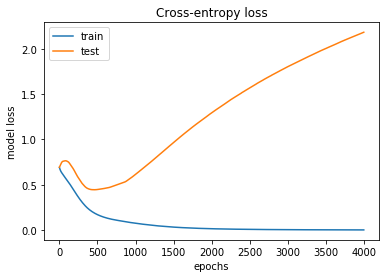

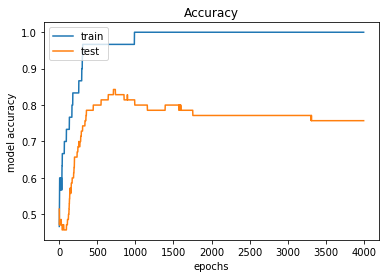

In [78]:

plt.title('Cross-entropy loss')
plt.xlabel('epochs')
plt.ylabel('model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'],loc='upper left')

plt.show()

In [80]:
from keras.layers import Dropout
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4000)

Epoch 1/4000
1/1 [==============================] - 1s 837ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5286
Epoch 2/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.6878 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.5143
Epoch 3/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.6946 - accuracy: 0.5333 - val_loss: 0.6952 - val_accuracy: 0.5143
Epoch 4/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.6899 - accuracy: 0.5667 - val_loss: 0.6963 - val_accuracy: 0.4286
Epoch 5/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.6877 - accuracy: 0.5667 - val_loss: 0.6974 - val_accuracy: 0.4429
Epoch 6/4000
1/1 [==============================] - 0s 69ms/step - loss: 0.6817 - accuracy: 0.6333 - val_loss: 0.6985 - val_accuracy: 0.4714
Epoch 7/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.6885 - accuracy: 0.5000 - val_loss: 0.6996 - val_accuracy: 0.4714
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.6265 - accuracy: 0.6333 - val_loss: 0.7488 - val_accuracy: 0.4857
Epoch 60/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.6316 - accuracy: 0.6000 - val_loss: 0.7492 - val_accuracy: 0.4857
Epoch 61/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.6193 - accuracy: 0.6333 - val_loss: 0.7497 - val_accuracy: 0.4857
Epoch 62/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.6287 - accuracy: 0.6333 - val_loss: 0.7502 - val_accuracy: 0.4857
Epoch 63/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.6226 - accuracy: 0.6333 - val_loss: 0.7507 - val_accuracy: 0.4857
Epoch 64/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.6406 - accuracy: 0.6333 - val_loss: 0.7510 - val_accuracy: 0.4857
Epoch 65/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.6232 - accuracy: 0.5667 - val_loss: 0.7513 - val_accuracy: 0.4857
Epoch 

1/1 [==============================] - 0s 46ms/step - loss: 0.5667 - accuracy: 0.7667 - val_loss: 0.7650 - val_accuracy: 0.4571
Epoch 174/4000
1/1 [==============================] - 0s 57ms/step - loss: 0.5921 - accuracy: 0.6333 - val_loss: 0.7651 - val_accuracy: 0.4571
Epoch 175/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.5581 - accuracy: 0.6667 - val_loss: 0.7651 - val_accuracy: 0.4571
Epoch 176/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.5811 - accuracy: 0.6667 - val_loss: 0.7651 - val_accuracy: 0.4571
Epoch 177/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.5695 - accuracy: 0.7000 - val_loss: 0.7649 - val_accuracy: 0.4571
Epoch 178/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.5850 - accuracy: 0.6667 - val_loss: 0.7646 - val_accuracy: 0.4571
Epoch 179/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.5627 - accuracy: 0.6667 - val_loss: 0.7645 - val_accuracy: 0.4571
Epoch 180/4000

1/1 [==============================] - 0s 43ms/step - loss: 0.5331 - accuracy: 0.7667 - val_loss: 0.7493 - val_accuracy: 0.5286
Epoch 288/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.5449 - accuracy: 0.7333 - val_loss: 0.7492 - val_accuracy: 0.5286
Epoch 289/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.5278 - accuracy: 0.7667 - val_loss: 0.7491 - val_accuracy: 0.5286
Epoch 290/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.5399 - accuracy: 0.7667 - val_loss: 0.7489 - val_accuracy: 0.5286
Epoch 291/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.5284 - accuracy: 0.7667 - val_loss: 0.7487 - val_accuracy: 0.5286
Epoch 292/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.5219 - accuracy: 0.7333 - val_loss: 0.7486 - val_accuracy: 0.5286
Epoch 293/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.5206 - accuracy: 0.7333 - val_loss: 0.7484 - val_accuracy: 0.5286
Epoch 294/4000

1/1 [==============================] - 0s 52ms/step - loss: 0.5312 - accuracy: 0.7000 - val_loss: 0.7214 - val_accuracy: 0.5571
Epoch 402/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.4719 - accuracy: 0.7333 - val_loss: 0.7211 - val_accuracy: 0.5571
Epoch 403/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.4630 - accuracy: 0.7667 - val_loss: 0.7205 - val_accuracy: 0.5571
Epoch 404/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.5165 - accuracy: 0.7333 - val_loss: 0.7195 - val_accuracy: 0.5571
Epoch 405/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.4823 - accuracy: 0.8000 - val_loss: 0.7185 - val_accuracy: 0.5571
Epoch 406/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.4797 - accuracy: 0.8000 - val_loss: 0.7174 - val_accuracy: 0.5571
Epoch 407/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.4766 - accuracy: 0.8000 - val_loss: 0.7164 - val_accuracy: 0.5571
Epoch 408/4000

1/1 [==============================] - 0s 97ms/step - loss: 0.4516 - accuracy: 0.7667 - val_loss: 0.6740 - val_accuracy: 0.6143
Epoch 516/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.4800 - accuracy: 0.7667 - val_loss: 0.6732 - val_accuracy: 0.6143
Epoch 517/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.4166 - accuracy: 0.8333 - val_loss: 0.6727 - val_accuracy: 0.6143
Epoch 518/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.4353 - accuracy: 0.7667 - val_loss: 0.6722 - val_accuracy: 0.6143
Epoch 519/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.4538 - accuracy: 0.8333 - val_loss: 0.6720 - val_accuracy: 0.6143
Epoch 520/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.4122 - accuracy: 0.8000 - val_loss: 0.6719 - val_accuracy: 0.6143
Epoch 521/4000
1/1 [==============================] - 0s 110ms/step - loss: 0.4805 - accuracy: 0.7333 - val_loss: 0.6719 - val_accuracy: 0.6143
Epoch 522/400

1/1 [==============================] - 0s 42ms/step - loss: 0.4074 - accuracy: 0.8333 - val_loss: 0.6420 - val_accuracy: 0.6286
Epoch 630/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.3915 - accuracy: 0.8333 - val_loss: 0.6415 - val_accuracy: 0.6286
Epoch 631/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.4394 - accuracy: 0.8333 - val_loss: 0.6408 - val_accuracy: 0.6286
Epoch 632/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.4326 - accuracy: 0.7667 - val_loss: 0.6395 - val_accuracy: 0.6286
Epoch 633/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.4159 - accuracy: 0.8000 - val_loss: 0.6379 - val_accuracy: 0.6429
Epoch 634/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.4384 - accuracy: 0.8000 - val_loss: 0.6365 - val_accuracy: 0.6429
Epoch 635/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.4330 - accuracy: 0.7667 - val_loss: 0.6352 - val_accuracy: 0.6429
Epoch 636/4000

1/1 [==============================] - 0s 39ms/step - loss: 0.3418 - accuracy: 0.9000 - val_loss: 0.5966 - val_accuracy: 0.6714
Epoch 744/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.3499 - accuracy: 0.9000 - val_loss: 0.5961 - val_accuracy: 0.6714
Epoch 745/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.3748 - accuracy: 0.8333 - val_loss: 0.5953 - val_accuracy: 0.6714
Epoch 746/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.3826 - accuracy: 0.8667 - val_loss: 0.5946 - val_accuracy: 0.6857
Epoch 747/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.3915 - accuracy: 0.8000 - val_loss: 0.5931 - val_accuracy: 0.6857
Epoch 748/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.3846 - accuracy: 0.8000 - val_loss: 0.5917 - val_accuracy: 0.6857
Epoch 749/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.4075 - accuracy: 0.8667 - val_loss: 0.5909 - val_accuracy: 0.6857
Epoch 750/4000

1/1 [==============================] - 0s 37ms/step - loss: 0.4279 - accuracy: 0.8333 - val_loss: 0.5643 - val_accuracy: 0.7000
Epoch 858/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.3485 - accuracy: 0.8333 - val_loss: 0.5636 - val_accuracy: 0.7000
Epoch 859/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.4016 - accuracy: 0.7667 - val_loss: 0.5628 - val_accuracy: 0.7000
Epoch 860/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.3422 - accuracy: 0.8667 - val_loss: 0.5623 - val_accuracy: 0.7000
Epoch 861/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.3836 - accuracy: 0.8667 - val_loss: 0.5626 - val_accuracy: 0.7000
Epoch 862/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.3816 - accuracy: 0.9000 - val_loss: 0.5636 - val_accuracy: 0.7000
Epoch 863/4000
1/1 [==============================] - 0s 98ms/step - loss: 0.4197 - accuracy: 0.8000 - val_loss: 0.5643 - val_accuracy: 0.6857
Epoch 864/4000

1/1 [==============================] - 0s 59ms/step - loss: 0.3377 - accuracy: 0.9333 - val_loss: 0.5554 - val_accuracy: 0.7000
Epoch 915/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.3426 - accuracy: 0.9000 - val_loss: 0.5551 - val_accuracy: 0.7000
Epoch 916/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.3341 - accuracy: 0.8667 - val_loss: 0.5554 - val_accuracy: 0.7000
Epoch 917/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.3825 - accuracy: 0.8333 - val_loss: 0.5557 - val_accuracy: 0.7000
Epoch 918/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.3751 - accuracy: 0.8000 - val_loss: 0.5563 - val_accuracy: 0.7000
Epoch 919/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.3230 - accuracy: 0.9000 - val_loss: 0.5574 - val_accuracy: 0.7000
Epoch 920/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.3606 - accuracy: 0.8667 - val_loss: 0.5583 - val_accuracy: 0.7000
Epoch 921/4000

1/1 [==============================] - 0s 119ms/step - loss: 0.3339 - accuracy: 0.8667 - val_loss: 0.5337 - val_accuracy: 0.7143
Epoch 1029/4000
1/1 [==============================] - 0s 107ms/step - loss: 0.3123 - accuracy: 0.9000 - val_loss: 0.5319 - val_accuracy: 0.7286
Epoch 1030/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.3852 - accuracy: 0.8333 - val_loss: 0.5294 - val_accuracy: 0.7286
Epoch 1031/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.3239 - accuracy: 0.8667 - val_loss: 0.5277 - val_accuracy: 0.7286
Epoch 1032/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.3450 - accuracy: 0.8667 - val_loss: 0.5266 - val_accuracy: 0.7286
Epoch 1033/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.3332 - accuracy: 0.9000 - val_loss: 0.5270 - val_accuracy: 0.7286
Epoch 1034/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.3611 - accuracy: 0.8333 - val_loss: 0.5272 - val_accuracy: 0.7286
Epoch 

Epoch 1085/4000
1/1 [==============================] - 0s 65ms/step - loss: 0.3323 - accuracy: 0.8667 - val_loss: 0.5443 - val_accuracy: 0.7000
Epoch 1086/4000
1/1 [==============================] - 0s 63ms/step - loss: 0.3589 - accuracy: 0.8667 - val_loss: 0.5429 - val_accuracy: 0.7000
Epoch 1087/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.3326 - accuracy: 0.9000 - val_loss: 0.5414 - val_accuracy: 0.7000
Epoch 1088/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.3507 - accuracy: 0.8333 - val_loss: 0.5398 - val_accuracy: 0.7000
Epoch 1089/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.3200 - accuracy: 0.9000 - val_loss: 0.5384 - val_accuracy: 0.7000
Epoch 1090/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.3071 - accuracy: 0.8667 - val_loss: 0.5364 - val_accuracy: 0.7000
Epoch 1091/4000
1/1 [==============================] - 0s 165ms/step - loss: 0.3337 - accuracy: 0.8667 - val_loss: 0.5337 - val_accuracy

Epoch 1142/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.3048 - accuracy: 0.8667 - val_loss: 0.5353 - val_accuracy: 0.7143
Epoch 1143/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.3148 - accuracy: 0.8333 - val_loss: 0.5368 - val_accuracy: 0.7143
Epoch 1144/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.3283 - accuracy: 0.9000 - val_loss: 0.5378 - val_accuracy: 0.7143
Epoch 1145/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.5394 - val_accuracy: 0.7143
Epoch 1146/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.3163 - accuracy: 0.8667 - val_loss: 0.5408 - val_accuracy: 0.7143
Epoch 1147/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.3205 - accuracy: 0.8667 - val_loss: 0.5418 - val_accuracy: 0.7143
Epoch 1148/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.3517 - accuracy: 0.8667 - val_loss: 0.5420 - val_accuracy:

Epoch 1199/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.3084 - accuracy: 0.9000 - val_loss: 0.5184 - val_accuracy: 0.7571
Epoch 1200/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.3130 - accuracy: 0.9667 - val_loss: 0.5182 - val_accuracy: 0.7571
Epoch 1201/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.3248 - accuracy: 0.8667 - val_loss: 0.5180 - val_accuracy: 0.7571
Epoch 1202/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.3035 - accuracy: 0.8667 - val_loss: 0.5181 - val_accuracy: 0.7571
Epoch 1203/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2659 - accuracy: 0.9333 - val_loss: 0.5194 - val_accuracy: 0.7571
Epoch 1204/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.3589 - accuracy: 0.7667 - val_loss: 0.5206 - val_accuracy: 0.7571
Epoch 1205/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2700 - accuracy: 0.9667 - val_loss: 0.5223 - val_accuracy:

Epoch 1256/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2794 - accuracy: 0.9333 - val_loss: 0.5169 - val_accuracy: 0.7286
Epoch 1257/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2992 - accuracy: 0.9000 - val_loss: 0.5147 - val_accuracy: 0.7286
Epoch 1258/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.3707 - accuracy: 0.8333 - val_loss: 0.5121 - val_accuracy: 0.7286
Epoch 1259/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2667 - accuracy: 0.9333 - val_loss: 0.5104 - val_accuracy: 0.7429
Epoch 1260/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2772 - accuracy: 0.9000 - val_loss: 0.5085 - val_accuracy: 0.7429
Epoch 1261/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2769 - accuracy: 0.9667 - val_loss: 0.5070 - val_accuracy: 0.7429
Epoch 1262/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2920 - accuracy: 0.9333 - val_loss: 0.5065 - val_accuracy:

Epoch 1313/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.2594 - accuracy: 0.9000 - val_loss: 0.5027 - val_accuracy: 0.7429
Epoch 1314/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.3197 - accuracy: 0.8333 - val_loss: 0.5024 - val_accuracy: 0.7429
Epoch 1315/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.2812 - accuracy: 0.9333 - val_loss: 0.5027 - val_accuracy: 0.7429
Epoch 1316/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2481 - accuracy: 0.9000 - val_loss: 0.5035 - val_accuracy: 0.7429
Epoch 1317/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2998 - accuracy: 0.9000 - val_loss: 0.5036 - val_accuracy: 0.7429
Epoch 1318/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.3309 - accuracy: 0.8333 - val_loss: 0.5039 - val_accuracy: 0.7429
Epoch 1319/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2833 - accuracy: 0.9000 - val_loss: 0.5043 - val_accuracy:

Epoch 1370/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2997 - accuracy: 0.8667 - val_loss: 0.5217 - val_accuracy: 0.7286
Epoch 1371/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.3608 - accuracy: 0.9000 - val_loss: 0.5244 - val_accuracy: 0.7286
Epoch 1372/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.2865 - accuracy: 0.9000 - val_loss: 0.5251 - val_accuracy: 0.7143
Epoch 1373/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.2533 - accuracy: 0.9333 - val_loss: 0.5264 - val_accuracy: 0.7143
Epoch 1374/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.3392 - accuracy: 0.8333 - val_loss: 0.5276 - val_accuracy: 0.7143
Epoch 1375/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.3069 - accuracy: 0.8000 - val_loss: 0.5264 - val_accuracy: 0.7143
Epoch 1376/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2951 - accuracy: 0.9000 - val_loss: 0.5266 - val_accuracy:

Epoch 1427/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.2942 - accuracy: 0.9000 - val_loss: 0.4876 - val_accuracy: 0.7571
Epoch 1428/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.2535 - accuracy: 0.9333 - val_loss: 0.4874 - val_accuracy: 0.7571
Epoch 1429/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2854 - accuracy: 0.9000 - val_loss: 0.4874 - val_accuracy: 0.7571
Epoch 1430/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.3217 - accuracy: 0.8667 - val_loss: 0.4874 - val_accuracy: 0.7571
Epoch 1431/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.2857 - accuracy: 0.9000 - val_loss: 0.4863 - val_accuracy: 0.7571
Epoch 1432/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.3083 - accuracy: 0.9000 - val_loss: 0.4854 - val_accuracy: 0.7571
Epoch 1433/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2750 - accuracy: 0.9000 - val_loss: 0.4843 - val_accuracy:

Epoch 1484/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.2517 - accuracy: 0.9333 - val_loss: 0.5109 - val_accuracy: 0.7286
Epoch 1485/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.2090 - accuracy: 0.9333 - val_loss: 0.5117 - val_accuracy: 0.7286
Epoch 1486/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2912 - accuracy: 0.8667 - val_loss: 0.5117 - val_accuracy: 0.7286
Epoch 1487/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.2384 - accuracy: 0.9000 - val_loss: 0.5117 - val_accuracy: 0.7286
Epoch 1488/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.2361 - accuracy: 0.9667 - val_loss: 0.5113 - val_accuracy: 0.7286
Epoch 1489/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2614 - accuracy: 0.8667 - val_loss: 0.5091 - val_accuracy: 0.7286
Epoch 1490/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.2616 - accuracy: 0.9667 - val_loss: 0.5071 - val_accuracy:

Epoch 1541/4000
1/1 [==============================] - 0s 59ms/step - loss: 0.2070 - accuracy: 0.9333 - val_loss: 0.4944 - val_accuracy: 0.7571
Epoch 1542/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2144 - accuracy: 0.9000 - val_loss: 0.4952 - val_accuracy: 0.7571
Epoch 1543/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.3007 - accuracy: 0.8333 - val_loss: 0.4968 - val_accuracy: 0.7571
Epoch 1544/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2505 - accuracy: 0.9000 - val_loss: 0.4986 - val_accuracy: 0.7571
Epoch 1545/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.3047 - accuracy: 0.8667 - val_loss: 0.5001 - val_accuracy: 0.7571
Epoch 1546/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.3399 - accuracy: 0.8667 - val_loss: 0.5020 - val_accuracy: 0.7571
Epoch 1547/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2738 - accuracy: 0.9333 - val_loss: 0.5023 - val_accuracy:

Epoch 1598/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.1868 - accuracy: 0.9667 - val_loss: 0.5041 - val_accuracy: 0.7429
Epoch 1599/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2826 - accuracy: 0.9333 - val_loss: 0.5026 - val_accuracy: 0.7429
Epoch 1600/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2942 - accuracy: 0.8000 - val_loss: 0.5014 - val_accuracy: 0.7571
Epoch 1601/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.3028 - accuracy: 0.8333 - val_loss: 0.5003 - val_accuracy: 0.7571
Epoch 1602/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2575 - accuracy: 0.9000 - val_loss: 0.4985 - val_accuracy: 0.7571
Epoch 1603/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.3972 - accuracy: 0.8333 - val_loss: 0.4964 - val_accuracy: 0.7571
Epoch 1604/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2054 - accuracy: 0.9000 - val_loss: 0.4954 - val_accuracy:

Epoch 1655/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.2653 - accuracy: 0.8667 - val_loss: 0.5220 - val_accuracy: 0.7286
Epoch 1656/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2908 - accuracy: 0.8667 - val_loss: 0.5219 - val_accuracy: 0.7429
Epoch 1657/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.2086 - accuracy: 0.9333 - val_loss: 0.5225 - val_accuracy: 0.7429
Epoch 1658/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.2194 - accuracy: 0.8667 - val_loss: 0.5231 - val_accuracy: 0.7429
Epoch 1659/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.3149 - accuracy: 0.8000 - val_loss: 0.5236 - val_accuracy: 0.7571
Epoch 1660/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2298 - accuracy: 1.0000 - val_loss: 0.5237 - val_accuracy: 0.7571
Epoch 1661/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.3130 - accuracy: 0.8667 - val_loss: 0.5225 - val_accuracy:

Epoch 1712/4000
1/1 [==============================] - 0s 75ms/step - loss: 0.2725 - accuracy: 0.9000 - val_loss: 0.4877 - val_accuracy: 0.7857
Epoch 1713/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.2521 - accuracy: 0.9333 - val_loss: 0.4870 - val_accuracy: 0.7714
Epoch 1714/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2971 - accuracy: 0.8667 - val_loss: 0.4860 - val_accuracy: 0.7714
Epoch 1715/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.2816 - accuracy: 0.8333 - val_loss: 0.4853 - val_accuracy: 0.7714
Epoch 1716/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2699 - accuracy: 0.9333 - val_loss: 0.4840 - val_accuracy: 0.7714
Epoch 1717/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.2372 - accuracy: 0.9667 - val_loss: 0.4829 - val_accuracy: 0.7714
Epoch 1718/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2407 - accuracy: 0.9333 - val_loss: 0.4835 - val_accuracy:

Epoch 1769/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2854 - accuracy: 0.9000 - val_loss: 0.4770 - val_accuracy: 0.7714
Epoch 1770/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2494 - accuracy: 0.9333 - val_loss: 0.4760 - val_accuracy: 0.7714
Epoch 1771/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2624 - accuracy: 0.8667 - val_loss: 0.4762 - val_accuracy: 0.7714
Epoch 1772/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.2624 - accuracy: 0.9333 - val_loss: 0.4767 - val_accuracy: 0.7714
Epoch 1773/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.2667 - accuracy: 0.9000 - val_loss: 0.4783 - val_accuracy: 0.7714
Epoch 1774/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2132 - accuracy: 0.9333 - val_loss: 0.4802 - val_accuracy: 0.7714
Epoch 1775/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.2538 - accuracy: 0.8667 - val_loss: 0.4832 - val_accuracy:

1/1 [==============================] - 0s 49ms/step - loss: 0.2474 - accuracy: 0.9333 - val_loss: 0.4895 - val_accuracy: 0.7714
Epoch 1883/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.3616 - accuracy: 0.8333 - val_loss: 0.4875 - val_accuracy: 0.7714
Epoch 1884/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2294 - accuracy: 0.9667 - val_loss: 0.4856 - val_accuracy: 0.7714
Epoch 1885/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.2581 - accuracy: 0.9333 - val_loss: 0.4851 - val_accuracy: 0.7714
Epoch 1886/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2375 - accuracy: 0.8667 - val_loss: 0.4835 - val_accuracy: 0.7714
Epoch 1887/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2591 - accuracy: 0.9000 - val_loss: 0.4810 - val_accuracy: 0.7714
Epoch 1888/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.2617 - accuracy: 0.8667 - val_loss: 0.4803 - val_accuracy: 0.7714
Epoch 18

1/1 [==============================] - 0s 35ms/step - loss: 0.3500 - accuracy: 0.8333 - val_loss: 0.4814 - val_accuracy: 0.7857
Epoch 1940/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2312 - accuracy: 0.9333 - val_loss: 0.4810 - val_accuracy: 0.7857
Epoch 1941/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2324 - accuracy: 0.9000 - val_loss: 0.4823 - val_accuracy: 0.7857
Epoch 1942/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.2856 - accuracy: 0.8667 - val_loss: 0.4842 - val_accuracy: 0.7571
Epoch 1943/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.3333 - accuracy: 0.8667 - val_loss: 0.4871 - val_accuracy: 0.7429
Epoch 1944/4000
1/1 [==============================] - 0s 34ms/step - loss: 0.2578 - accuracy: 0.9333 - val_loss: 0.4886 - val_accuracy: 0.7429
Epoch 1945/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2324 - accuracy: 0.9333 - val_loss: 0.4913 - val_accuracy: 0.7429
Epoch 19

1/1 [==============================] - 0s 43ms/step - loss: 0.2812 - accuracy: 0.8667 - val_loss: 0.4896 - val_accuracy: 0.7857
Epoch 1997/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.1699 - accuracy: 1.0000 - val_loss: 0.4893 - val_accuracy: 0.7714
Epoch 1998/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2898 - accuracy: 0.8667 - val_loss: 0.4900 - val_accuracy: 0.7714
Epoch 1999/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.2536 - accuracy: 0.8667 - val_loss: 0.4919 - val_accuracy: 0.7714
Epoch 2000/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2163 - accuracy: 0.9333 - val_loss: 0.4933 - val_accuracy: 0.7714
Epoch 2001/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.2902 - accuracy: 0.8333 - val_loss: 0.4956 - val_accuracy: 0.7571
Epoch 2002/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2788 - accuracy: 0.9000 - val_loss: 0.4978 - val_accuracy: 0.7571
Epoch 20

1/1 [==============================] - 0s 36ms/step - loss: 0.2620 - accuracy: 0.9000 - val_loss: 0.4914 - val_accuracy: 0.7571
Epoch 2054/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.1519 - accuracy: 0.9333 - val_loss: 0.4923 - val_accuracy: 0.7429
Epoch 2055/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.2099 - accuracy: 0.9333 - val_loss: 0.4935 - val_accuracy: 0.7429
Epoch 2056/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.1968 - accuracy: 0.9000 - val_loss: 0.4943 - val_accuracy: 0.7429
Epoch 2057/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2018 - accuracy: 0.9667 - val_loss: 0.4961 - val_accuracy: 0.7429
Epoch 2058/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.2162 - accuracy: 0.9333 - val_loss: 0.4977 - val_accuracy: 0.7429
Epoch 2059/4000
1/1 [==============================] - 0s 32ms/step - loss: 0.3141 - accuracy: 0.7667 - val_loss: 0.5007 - val_accuracy: 0.7429
Epoch 20

1/1 [==============================] - 0s 34ms/step - loss: 0.2007 - accuracy: 0.9333 - val_loss: 0.5039 - val_accuracy: 0.7429
Epoch 2111/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.2267 - accuracy: 0.9667 - val_loss: 0.5044 - val_accuracy: 0.7429
Epoch 2112/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2138 - accuracy: 0.9333 - val_loss: 0.5064 - val_accuracy: 0.7429
Epoch 2113/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.2331 - accuracy: 0.9667 - val_loss: 0.5075 - val_accuracy: 0.7286
Epoch 2114/4000
1/1 [==============================] - 0s 57ms/step - loss: 0.1794 - accuracy: 0.9333 - val_loss: 0.5083 - val_accuracy: 0.7286
Epoch 2115/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2602 - accuracy: 0.9000 - val_loss: 0.5080 - val_accuracy: 0.7286
Epoch 2116/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.2140 - accuracy: 0.8667 - val_loss: 0.5074 - val_accuracy: 0.7286
Epoch 21

1/1 [==============================] - 0s 168ms/step - loss: 0.3074 - accuracy: 0.8667 - val_loss: 0.5067 - val_accuracy: 0.7714
Epoch 2168/4000
1/1 [==============================] - 0s 57ms/step - loss: 0.2078 - accuracy: 0.9333 - val_loss: 0.5067 - val_accuracy: 0.7714
Epoch 2169/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2478 - accuracy: 0.9000 - val_loss: 0.5065 - val_accuracy: 0.7714
Epoch 2170/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2209 - accuracy: 0.9667 - val_loss: 0.5055 - val_accuracy: 0.7571
Epoch 2171/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.1997 - accuracy: 0.9333 - val_loss: 0.5048 - val_accuracy: 0.7714
Epoch 2172/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.2170 - accuracy: 0.9333 - val_loss: 0.5037 - val_accuracy: 0.7571
Epoch 2173/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2534 - accuracy: 0.9000 - val_loss: 0.5015 - val_accuracy: 0.7714
Epoch 2

Epoch 2224/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2080 - accuracy: 0.9333 - val_loss: 0.4987 - val_accuracy: 0.7429
Epoch 2225/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2947 - accuracy: 0.8667 - val_loss: 0.4951 - val_accuracy: 0.7429
Epoch 2226/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.2514 - accuracy: 0.8667 - val_loss: 0.4929 - val_accuracy: 0.7429
Epoch 2227/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.2130 - accuracy: 0.9667 - val_loss: 0.4898 - val_accuracy: 0.7429
Epoch 2228/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.2352 - accuracy: 0.9333 - val_loss: 0.4866 - val_accuracy: 0.7714
Epoch 2229/4000
1/1 [==============================] - 0s 57ms/step - loss: 0.2834 - accuracy: 0.8667 - val_loss: 0.4845 - val_accuracy: 0.7714
Epoch 2230/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2249 - accuracy: 0.9667 - val_loss: 0.4827 - val_accuracy:

Epoch 2281/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.3213 - accuracy: 0.8333 - val_loss: 0.4995 - val_accuracy: 0.7571
Epoch 2282/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.1884 - accuracy: 0.9333 - val_loss: 0.5042 - val_accuracy: 0.7429
Epoch 2283/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.2358 - accuracy: 0.9333 - val_loss: 0.5078 - val_accuracy: 0.7429
Epoch 2284/4000
1/1 [==============================] - 0s 68ms/step - loss: 0.2433 - accuracy: 0.9333 - val_loss: 0.5100 - val_accuracy: 0.7429
Epoch 2285/4000
1/1 [==============================] - 0s 81ms/step - loss: 0.2082 - accuracy: 0.9667 - val_loss: 0.5117 - val_accuracy: 0.7429
Epoch 2286/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.2438 - accuracy: 0.9333 - val_loss: 0.5120 - val_accuracy: 0.7429
Epoch 2287/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.2004 - accuracy: 0.9000 - val_loss: 0.5116 - val_accuracy:

Epoch 2338/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2677 - accuracy: 0.9000 - val_loss: 0.5095 - val_accuracy: 0.7571
Epoch 2339/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1788 - accuracy: 0.9333 - val_loss: 0.5101 - val_accuracy: 0.7571
Epoch 2340/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2972 - accuracy: 0.8333 - val_loss: 0.5116 - val_accuracy: 0.7429
Epoch 2341/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.2159 - accuracy: 0.9333 - val_loss: 0.5134 - val_accuracy: 0.7571
Epoch 2342/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.2367 - accuracy: 0.9000 - val_loss: 0.5158 - val_accuracy: 0.7571
Epoch 2343/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2216 - accuracy: 0.9333 - val_loss: 0.5165 - val_accuracy: 0.7571
Epoch 2344/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.2730 - accuracy: 0.9000 - val_loss: 0.5170 - val_accuracy:

Epoch 2451/4000
1/1 [==============================] - 0s 87ms/step - loss: 0.2329 - accuracy: 0.9000 - val_loss: 0.4822 - val_accuracy: 0.7714
Epoch 2452/4000
1/1 [==============================] - 0s 65ms/step - loss: 0.2312 - accuracy: 0.8667 - val_loss: 0.4850 - val_accuracy: 0.7714
Epoch 2453/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.2137 - accuracy: 0.9333 - val_loss: 0.4870 - val_accuracy: 0.7714
Epoch 2454/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.2177 - accuracy: 0.9333 - val_loss: 0.4888 - val_accuracy: 0.7714
Epoch 2455/4000
1/1 [==============================] - 0s 65ms/step - loss: 0.2312 - accuracy: 0.9000 - val_loss: 0.4901 - val_accuracy: 0.7571
Epoch 2456/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.1795 - accuracy: 0.9333 - val_loss: 0.4913 - val_accuracy: 0.7571
Epoch 2457/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.1972 - accuracy: 0.9333 - val_loss: 0.4927 - val_accuracy:

Epoch 2508/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2844 - accuracy: 0.9333 - val_loss: 0.5279 - val_accuracy: 0.7714
Epoch 2509/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.1759 - accuracy: 0.9667 - val_loss: 0.5309 - val_accuracy: 0.7571
Epoch 2510/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.1693 - accuracy: 0.9667 - val_loss: 0.5336 - val_accuracy: 0.7571
Epoch 2511/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2237 - accuracy: 0.9000 - val_loss: 0.5355 - val_accuracy: 0.7571
Epoch 2512/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2822 - accuracy: 0.9000 - val_loss: 0.5365 - val_accuracy: 0.7571
Epoch 2513/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.2174 - accuracy: 0.9333 - val_loss: 0.5367 - val_accuracy: 0.7429
Epoch 2514/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.2642 - accuracy: 0.9667 - val_loss: 0.5361 - val_accuracy:

Epoch 2565/4000
1/1 [==============================] - 0s 63ms/step - loss: 0.2547 - accuracy: 0.9000 - val_loss: 0.5117 - val_accuracy: 0.7714
Epoch 2566/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2432 - accuracy: 0.9000 - val_loss: 0.5143 - val_accuracy: 0.7714
Epoch 2567/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.2062 - accuracy: 0.9333 - val_loss: 0.5167 - val_accuracy: 0.7714
Epoch 2568/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2208 - accuracy: 0.9333 - val_loss: 0.5193 - val_accuracy: 0.7571
Epoch 2569/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1606 - accuracy: 1.0000 - val_loss: 0.5222 - val_accuracy: 0.7429
Epoch 2570/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.2895 - accuracy: 0.8333 - val_loss: 0.5255 - val_accuracy: 0.7429
Epoch 2571/4000
1/1 [==============================] - 0s 57ms/step - loss: 0.2303 - accuracy: 0.9667 - val_loss: 0.5267 - val_accuracy:

Epoch 2622/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4878 - val_accuracy: 0.7714
Epoch 2623/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.2493 - accuracy: 0.8667 - val_loss: 0.4902 - val_accuracy: 0.7714
Epoch 2624/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.2234 - accuracy: 0.9000 - val_loss: 0.4923 - val_accuracy: 0.7714
Epoch 2625/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.1963 - accuracy: 0.9667 - val_loss: 0.4943 - val_accuracy: 0.7714
Epoch 2626/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.2781 - accuracy: 0.9000 - val_loss: 0.4962 - val_accuracy: 0.7571
Epoch 2627/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2466 - accuracy: 0.9000 - val_loss: 0.4986 - val_accuracy: 0.7571
Epoch 2628/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.2272 - accuracy: 0.9333 - val_loss: 0.5011 - val_accuracy:

Epoch 2679/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1863 - accuracy: 0.9667 - val_loss: 0.4873 - val_accuracy: 0.7857
Epoch 2680/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.1557 - accuracy: 0.9667 - val_loss: 0.4872 - val_accuracy: 0.7857
Epoch 2681/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2104 - accuracy: 0.9333 - val_loss: 0.4864 - val_accuracy: 0.7857
Epoch 2682/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2271 - accuracy: 0.9333 - val_loss: 0.4852 - val_accuracy: 0.7857
Epoch 2683/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.2252 - accuracy: 0.9333 - val_loss: 0.4846 - val_accuracy: 0.7857
Epoch 2684/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2554 - accuracy: 0.8667 - val_loss: 0.4850 - val_accuracy: 0.7857
Epoch 2685/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2614 - accuracy: 0.9333 - val_loss: 0.4860 - val_accuracy:

Epoch 2736/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2934 - accuracy: 0.9000 - val_loss: 0.4952 - val_accuracy: 0.7714
Epoch 2737/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.2134 - accuracy: 0.9000 - val_loss: 0.4961 - val_accuracy: 0.7571
Epoch 2738/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1679 - accuracy: 0.9333 - val_loss: 0.4952 - val_accuracy: 0.7714
Epoch 2739/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.1819 - accuracy: 0.9333 - val_loss: 0.4939 - val_accuracy: 0.7714
Epoch 2740/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.1806 - accuracy: 0.9333 - val_loss: 0.4917 - val_accuracy: 0.7714
Epoch 2741/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2135 - accuracy: 0.9000 - val_loss: 0.4893 - val_accuracy: 0.7714
Epoch 2742/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.1265 - accuracy: 0.9667 - val_loss: 0.4872 - val_accuracy:

Epoch 2793/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.1851 - accuracy: 0.9333 - val_loss: 0.4929 - val_accuracy: 0.7857
Epoch 2794/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.2749 - accuracy: 0.8667 - val_loss: 0.4924 - val_accuracy: 0.7857
Epoch 2795/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.1939 - accuracy: 0.9000 - val_loss: 0.4910 - val_accuracy: 0.7857
Epoch 2796/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.1819 - accuracy: 0.9667 - val_loss: 0.4897 - val_accuracy: 0.7857
Epoch 2797/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.2946 - accuracy: 0.8667 - val_loss: 0.4888 - val_accuracy: 0.8000
Epoch 2798/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2508 - accuracy: 0.9333 - val_loss: 0.4874 - val_accuracy: 0.7857
Epoch 2799/4000
1/1 [==============================] - 0s 68ms/step - loss: 0.2022 - accuracy: 0.9333 - val_loss: 0.4856 - val_accuracy:

Epoch 2850/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2642 - accuracy: 0.8667 - val_loss: 0.4798 - val_accuracy: 0.7857
Epoch 2851/4000
1/1 [==============================] - 0s 59ms/step - loss: 0.1481 - accuracy: 0.9667 - val_loss: 0.4814 - val_accuracy: 0.7714
Epoch 2852/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2249 - accuracy: 0.9333 - val_loss: 0.4826 - val_accuracy: 0.7714
Epoch 2853/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.2033 - accuracy: 0.9000 - val_loss: 0.4836 - val_accuracy: 0.7714
Epoch 2854/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.2278 - accuracy: 0.8333 - val_loss: 0.4865 - val_accuracy: 0.7714
Epoch 2855/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.2187 - accuracy: 0.9333 - val_loss: 0.4898 - val_accuracy: 0.7857
Epoch 2856/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.1821 - accuracy: 0.9667 - val_loss: 0.4924 - val_accuracy:

Epoch 2907/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2280 - accuracy: 0.8667 - val_loss: 0.5045 - val_accuracy: 0.7857
Epoch 2908/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.1634 - accuracy: 0.9333 - val_loss: 0.5031 - val_accuracy: 0.7857
Epoch 2909/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.5010 - val_accuracy: 0.7857
Epoch 2910/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.2762 - accuracy: 0.9000 - val_loss: 0.4993 - val_accuracy: 0.7857
Epoch 2911/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.1890 - accuracy: 0.9667 - val_loss: 0.4973 - val_accuracy: 0.7857
Epoch 2912/4000
1/1 [==============================] - 0s 64ms/step - loss: 0.3031 - accuracy: 0.9000 - val_loss: 0.4956 - val_accuracy: 0.8000
Epoch 2913/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.2020 - accuracy: 0.8667 - val_loss: 0.4947 - val_accuracy:

Epoch 2964/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2590 - accuracy: 0.9333 - val_loss: 0.4970 - val_accuracy: 0.8000
Epoch 2965/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.1763 - accuracy: 0.9667 - val_loss: 0.4964 - val_accuracy: 0.8000
Epoch 2966/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.1118 - accuracy: 1.0000 - val_loss: 0.4961 - val_accuracy: 0.8000
Epoch 2967/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.2064 - accuracy: 0.9667 - val_loss: 0.4956 - val_accuracy: 0.7857
Epoch 2968/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2535 - accuracy: 0.9000 - val_loss: 0.4960 - val_accuracy: 0.7857
Epoch 2969/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.1997 - accuracy: 0.9333 - val_loss: 0.4968 - val_accuracy: 0.7857
Epoch 2970/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.1843 - accuracy: 0.9667 - val_loss: 0.4974 - val_accuracy:

1/1 [==============================] - 0s 49ms/step - loss: 0.2713 - accuracy: 0.8333 - val_loss: 0.5110 - val_accuracy: 0.7714
Epoch 3078/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.1773 - accuracy: 0.9333 - val_loss: 0.5110 - val_accuracy: 0.7714
Epoch 3079/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.2329 - accuracy: 0.9333 - val_loss: 0.5110 - val_accuracy: 0.7714
Epoch 3080/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1681 - accuracy: 0.9333 - val_loss: 0.5113 - val_accuracy: 0.7714
Epoch 3081/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2423 - accuracy: 0.9000 - val_loss: 0.5127 - val_accuracy: 0.7857
Epoch 3082/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.2830 - accuracy: 0.9333 - val_loss: 0.5117 - val_accuracy: 0.7857
Epoch 3083/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2833 - accuracy: 0.8333 - val_loss: 0.5114 - val_accuracy: 0.7857
Epoch 30

1/1 [==============================] - 0s 48ms/step - loss: 0.1764 - accuracy: 0.9333 - val_loss: 0.4859 - val_accuracy: 0.7857
Epoch 3135/4000
1/1 [==============================] - 0s 62ms/step - loss: 0.2181 - accuracy: 0.9333 - val_loss: 0.4867 - val_accuracy: 0.7857
Epoch 3136/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.2318 - accuracy: 0.9000 - val_loss: 0.4875 - val_accuracy: 0.7857
Epoch 3137/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.1907 - accuracy: 0.9333 - val_loss: 0.4880 - val_accuracy: 0.7857
Epoch 3138/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1788 - accuracy: 0.9667 - val_loss: 0.4881 - val_accuracy: 0.7857
Epoch 3139/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.1929 - accuracy: 0.9333 - val_loss: 0.4901 - val_accuracy: 0.7857
Epoch 3140/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2749 - accuracy: 0.8667 - val_loss: 0.4918 - val_accuracy: 0.7714
Epoch 31

Epoch 3191/4000
1/1 [==============================] - 0s 33ms/step - loss: 0.2635 - accuracy: 0.9000 - val_loss: 0.5223 - val_accuracy: 0.7571
Epoch 3192/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2252 - accuracy: 0.9333 - val_loss: 0.5236 - val_accuracy: 0.7571
Epoch 3193/4000
1/1 [==============================] - 0s 67ms/step - loss: 0.2420 - accuracy: 0.9000 - val_loss: 0.5260 - val_accuracy: 0.7571
Epoch 3194/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.1584 - accuracy: 0.9667 - val_loss: 0.5286 - val_accuracy: 0.7571
Epoch 3195/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.1562 - accuracy: 0.9333 - val_loss: 0.5309 - val_accuracy: 0.7571
Epoch 3196/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.1926 - accuracy: 0.9000 - val_loss: 0.5333 - val_accuracy: 0.7571
Epoch 3197/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.1797 - accuracy: 0.9667 - val_loss: 0.5350 - val_accuracy:

Epoch 3248/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.1954 - accuracy: 0.9000 - val_loss: 0.5135 - val_accuracy: 0.7857
Epoch 3249/4000
1/1 [==============================] - 0s 60ms/step - loss: 0.2240 - accuracy: 0.9000 - val_loss: 0.5152 - val_accuracy: 0.7857
Epoch 3250/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.2371 - accuracy: 0.9000 - val_loss: 0.5182 - val_accuracy: 0.7857
Epoch 3251/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.1958 - accuracy: 0.9333 - val_loss: 0.5232 - val_accuracy: 0.7714
Epoch 3252/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1847 - accuracy: 0.9667 - val_loss: 0.5274 - val_accuracy: 0.7571
Epoch 3253/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.1924 - accuracy: 0.9000 - val_loss: 0.5305 - val_accuracy: 0.7571
Epoch 3254/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.1902 - accuracy: 0.9333 - val_loss: 0.5309 - val_accuracy:

Epoch 3305/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2195 - accuracy: 0.9000 - val_loss: 0.5009 - val_accuracy: 0.7714
Epoch 3306/4000
1/1 [==============================] - 0s 56ms/step - loss: 0.1722 - accuracy: 0.9333 - val_loss: 0.4992 - val_accuracy: 0.7714
Epoch 3307/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.1726 - accuracy: 0.9667 - val_loss: 0.4987 - val_accuracy: 0.7714
Epoch 3308/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1561 - accuracy: 0.9667 - val_loss: 0.4982 - val_accuracy: 0.7714
Epoch 3309/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1765 - accuracy: 0.9667 - val_loss: 0.4994 - val_accuracy: 0.7714
Epoch 3310/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2390 - accuracy: 0.9333 - val_loss: 0.5014 - val_accuracy: 0.7714
Epoch 3311/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1599 - accuracy: 0.9333 - val_loss: 0.5034 - val_accuracy:

Epoch 3362/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.1768 - accuracy: 0.9000 - val_loss: 0.5088 - val_accuracy: 0.7857
Epoch 3363/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2576 - accuracy: 0.9000 - val_loss: 0.5097 - val_accuracy: 0.7857
Epoch 3364/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.2245 - accuracy: 0.9000 - val_loss: 0.5109 - val_accuracy: 0.7857
Epoch 3365/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.2027 - accuracy: 0.9000 - val_loss: 0.5131 - val_accuracy: 0.7714
Epoch 3366/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1439 - accuracy: 1.0000 - val_loss: 0.5158 - val_accuracy: 0.7714
Epoch 3367/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.1815 - accuracy: 0.9333 - val_loss: 0.5190 - val_accuracy: 0.7714
Epoch 3368/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2427 - accuracy: 0.9333 - val_loss: 0.5212 - val_accuracy:

Epoch 3419/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.1966 - accuracy: 0.9333 - val_loss: 0.4946 - val_accuracy: 0.7857
Epoch 3420/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.2438 - accuracy: 0.8667 - val_loss: 0.4980 - val_accuracy: 0.7857
Epoch 3421/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.1442 - accuracy: 0.9667 - val_loss: 0.5017 - val_accuracy: 0.7857
Epoch 3422/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.1304 - accuracy: 0.9667 - val_loss: 0.5049 - val_accuracy: 0.7857
Epoch 3423/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2046 - accuracy: 0.9667 - val_loss: 0.5094 - val_accuracy: 0.7857
Epoch 3424/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.1706 - accuracy: 0.9333 - val_loss: 0.5140 - val_accuracy: 0.7714
Epoch 3425/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.1650 - accuracy: 0.9333 - val_loss: 0.5170 - val_accuracy:

Epoch 3476/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.1852 - accuracy: 0.9667 - val_loss: 0.4819 - val_accuracy: 0.8143
Epoch 3477/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.2225 - accuracy: 0.9000 - val_loss: 0.4816 - val_accuracy: 0.8143
Epoch 3478/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.1860 - accuracy: 0.9000 - val_loss: 0.4814 - val_accuracy: 0.8143
Epoch 3479/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.2440 - accuracy: 0.8667 - val_loss: 0.4830 - val_accuracy: 0.8143
Epoch 3480/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2455 - accuracy: 0.9333 - val_loss: 0.4840 - val_accuracy: 0.8000
Epoch 3481/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.1636 - accuracy: 0.9333 - val_loss: 0.4853 - val_accuracy: 0.8000
Epoch 3482/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.1589 - accuracy: 0.9000 - val_loss: 0.4866 - val_accuracy:

Epoch 3533/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2380 - accuracy: 0.8667 - val_loss: 0.5178 - val_accuracy: 0.7714
Epoch 3534/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1897 - accuracy: 0.9333 - val_loss: 0.5192 - val_accuracy: 0.7714
Epoch 3535/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1636 - accuracy: 0.9667 - val_loss: 0.5200 - val_accuracy: 0.7714
Epoch 3536/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.1909 - accuracy: 0.9333 - val_loss: 0.5201 - val_accuracy: 0.7714
Epoch 3537/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2628 - accuracy: 0.8667 - val_loss: 0.5193 - val_accuracy: 0.7714
Epoch 3538/4000
1/1 [==============================] - 0s 45ms/step - loss: 0.1696 - accuracy: 0.9667 - val_loss: 0.5197 - val_accuracy: 0.7714
Epoch 3539/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.1762 - accuracy: 0.9000 - val_loss: 0.5195 - val_accuracy:

Epoch 3590/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.1649 - accuracy: 0.9667 - val_loss: 0.5153 - val_accuracy: 0.7714
Epoch 3591/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1808 - accuracy: 0.9000 - val_loss: 0.5144 - val_accuracy: 0.7714
Epoch 3592/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2341 - accuracy: 0.8667 - val_loss: 0.5136 - val_accuracy: 0.7714
Epoch 3593/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1998 - accuracy: 0.9333 - val_loss: 0.5134 - val_accuracy: 0.7714
Epoch 3594/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.1789 - accuracy: 0.9000 - val_loss: 0.5127 - val_accuracy: 0.7714
Epoch 3595/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.2007 - accuracy: 0.9333 - val_loss: 0.5137 - val_accuracy: 0.7714
Epoch 3596/4000
1/1 [==============================] - 0s 69ms/step - loss: 0.1990 - accuracy: 0.9000 - val_loss: 0.5152 - val_accuracy:

Epoch 3647/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.1331 - accuracy: 0.9333 - val_loss: 0.5093 - val_accuracy: 0.7857
Epoch 3648/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2354 - accuracy: 0.8333 - val_loss: 0.5094 - val_accuracy: 0.7857
Epoch 3649/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.1852 - accuracy: 0.9333 - val_loss: 0.5089 - val_accuracy: 0.7857
Epoch 3650/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.1730 - accuracy: 0.9333 - val_loss: 0.5088 - val_accuracy: 0.7857
Epoch 3651/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.1567 - accuracy: 0.9667 - val_loss: 0.5087 - val_accuracy: 0.7857
Epoch 3652/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1885 - accuracy: 0.9333 - val_loss: 0.5091 - val_accuracy: 0.7857
Epoch 3653/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.2567 - accuracy: 0.8667 - val_loss: 0.5105 - val_accuracy:

1/1 [==============================] - 0s 42ms/step - loss: 0.1648 - accuracy: 0.9333 - val_loss: 0.5226 - val_accuracy: 0.7857
Epoch 3761/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.2296 - accuracy: 0.8667 - val_loss: 0.5224 - val_accuracy: 0.7857
Epoch 3762/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2007 - accuracy: 0.9667 - val_loss: 0.5232 - val_accuracy: 0.7857
Epoch 3763/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.1802 - accuracy: 0.9333 - val_loss: 0.5237 - val_accuracy: 0.7857
Epoch 3764/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.2101 - accuracy: 0.9000 - val_loss: 0.5235 - val_accuracy: 0.7857
Epoch 3765/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.2363 - accuracy: 0.8667 - val_loss: 0.5237 - val_accuracy: 0.7857
Epoch 3766/4000
1/1 [==============================] - 0s 43ms/step - loss: 0.2103 - accuracy: 0.9000 - val_loss: 0.5229 - val_accuracy: 0.7857
Epoch 37

1/1 [==============================] - 0s 43ms/step - loss: 0.1090 - accuracy: 0.9667 - val_loss: 0.5103 - val_accuracy: 0.8000
Epoch 3818/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2470 - accuracy: 0.8333 - val_loss: 0.5120 - val_accuracy: 0.7857
Epoch 3819/4000
1/1 [==============================] - 0s 71ms/step - loss: 0.1797 - accuracy: 0.9333 - val_loss: 0.5139 - val_accuracy: 0.7857
Epoch 3820/4000
1/1 [==============================] - 0s 46ms/step - loss: 0.1594 - accuracy: 0.9000 - val_loss: 0.5170 - val_accuracy: 0.8000
Epoch 3821/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1707 - accuracy: 0.9333 - val_loss: 0.5201 - val_accuracy: 0.8000
Epoch 3822/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1436 - accuracy: 0.8667 - val_loss: 0.5243 - val_accuracy: 0.7857
Epoch 3823/4000
1/1 [==============================] - 0s 49ms/step - loss: 0.1612 - accuracy: 0.9667 - val_loss: 0.5285 - val_accuracy: 0.7857
Epoch 38

1/1 [==============================] - 0s 48ms/step - loss: 0.2091 - accuracy: 0.9000 - val_loss: 0.5240 - val_accuracy: 0.7857
Epoch 3875/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.1635 - accuracy: 0.9667 - val_loss: 0.5238 - val_accuracy: 0.7857
Epoch 3876/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.2164 - accuracy: 0.9000 - val_loss: 0.5241 - val_accuracy: 0.7857
Epoch 3877/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2149 - accuracy: 0.8667 - val_loss: 0.5259 - val_accuracy: 0.7857
Epoch 3878/4000
1/1 [==============================] - 0s 38ms/step - loss: 0.1343 - accuracy: 0.9667 - val_loss: 0.5268 - val_accuracy: 0.7857
Epoch 3879/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.1612 - accuracy: 0.9667 - val_loss: 0.5278 - val_accuracy: 0.7857
Epoch 3880/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.2593 - accuracy: 0.8667 - val_loss: 0.5301 - val_accuracy: 0.7857
Epoch 38

1/1 [==============================] - 0s 48ms/step - loss: 0.1044 - accuracy: 1.0000 - val_loss: 0.5280 - val_accuracy: 0.7714
Epoch 3932/4000
1/1 [==============================] - 0s 65ms/step - loss: 0.2028 - accuracy: 0.9667 - val_loss: 0.5291 - val_accuracy: 0.7714
Epoch 3933/4000
1/1 [==============================] - 0s 52ms/step - loss: 0.2171 - accuracy: 0.9333 - val_loss: 0.5306 - val_accuracy: 0.7857
Epoch 3934/4000
1/1 [==============================] - 0s 44ms/step - loss: 0.1723 - accuracy: 0.9667 - val_loss: 0.5317 - val_accuracy: 0.7857
Epoch 3935/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.1621 - accuracy: 0.9333 - val_loss: 0.5324 - val_accuracy: 0.7857
Epoch 3936/4000
1/1 [==============================] - 0s 56ms/step - loss: 0.1983 - accuracy: 0.9333 - val_loss: 0.5351 - val_accuracy: 0.7714
Epoch 3937/4000
1/1 [==============================] - 0s 39ms/step - loss: 0.1496 - accuracy: 0.9667 - val_loss: 0.5385 - val_accuracy: 0.7714
Epoch 39

1/1 [==============================] - 0s 55ms/step - loss: 0.1292 - accuracy: 1.0000 - val_loss: 0.5220 - val_accuracy: 0.8000
Epoch 3989/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.1359 - accuracy: 1.0000 - val_loss: 0.5229 - val_accuracy: 0.8000
Epoch 3990/4000
1/1 [==============================] - 0s 47ms/step - loss: 0.2005 - accuracy: 0.9333 - val_loss: 0.5247 - val_accuracy: 0.8000
Epoch 3991/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.1485 - accuracy: 0.9667 - val_loss: 0.5265 - val_accuracy: 0.7857
Epoch 3992/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.1985 - accuracy: 0.8667 - val_loss: 0.5295 - val_accuracy: 0.7857
Epoch 3993/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.1523 - accuracy: 0.9333 - val_loss: 0.5332 - val_accuracy: 0.7857
Epoch 3994/4000
1/1 [==============================] - 0s 51ms/step - loss: 0.2243 - accuracy: 0.9000 - val_loss: 0.5384 - val_accuracy: 0.7857
Epoch 39

In [82]:
_,train_acc=model.evaluate(X_train,y_train)
_,test_acc=model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.7714


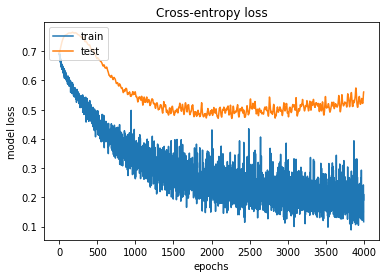

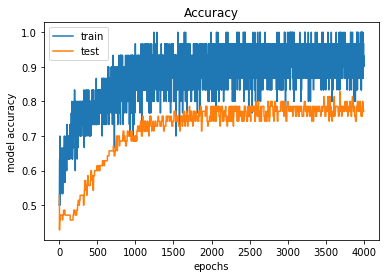

In [83]:

plt.title('Cross-entropy loss')
plt.xlabel('epochs')
plt.ylabel('model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'],loc='upper left')

plt.show()

In [84]:
from sklearn.datasets import make_blobs
from keras.optimizers import SGD
from keras.utils import to_categorical

In [95]:
def prepare_data():
    X,y=make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)
    y=to_categorical(y)
    n_train=500
    X_train, X_test=X[:n_train,:], X[n_train:,:]
    y_train, y_test=y[:n_train], y[n_train:]
    return X_train, X_test, y_train, y_test

In [96]:
def fit_model(X_train,X_test,y_train,y_test,lrate):
    model=Sequential()
    model.add(Dense(50,input_dim=2,kernel_initializer='he_uniform',activation='relu'))
    model.add(Dense(3,activation='softmax'))
    opt=SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)
    plt.plot(history.history['accuracy'],label='train')
    plt.plot(history.history['val_accuracy'],label='test')
    plt.title('Learning rate:'+str(lrate))

Epoch 1/200
16/16 [==============================] - 1s 15ms/step - loss: 16.5472 - accuracy: 0.5200 - val_loss: 3.4173 - val_accuracy: 0.4720
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 2.2589 - accuracy: 0.4640 - val_loss: 1.0032 - val_accuracy: 0.6000
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1348 - accuracy: 0.5260 - val_loss: 1.0359 - val_accuracy: 0.5560
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1870 - accuracy: 0.4960 - val_loss: 0.9074 - val_accuracy: 0.6280
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9099 - accuracy: 0.5760 - val_loss: 0.8976 - val_accuracy: 0.5880
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8991 - accuracy: 0.5880 - val_loss: 0.8059 - val_accuracy: 0.6260
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8315 - accuracy: 0.6240 - val_loss: 0.7813 - val_accuracy: 0.6260
Epoch 8/200

Epoch 59/200
16/16 [==============================] - 0s 6ms/step - loss: 0.8660 - accuracy: 0.6080 - val_loss: 0.8522 - val_accuracy: 0.6720
Epoch 60/200
16/16 [==============================] - 0s 6ms/step - loss: 0.7722 - accuracy: 0.6860 - val_loss: 0.7153 - val_accuracy: 0.6520
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 1.0620 - accuracy: 0.5440 - val_loss: 0.9589 - val_accuracy: 0.5240
Epoch 62/200
16/16 [==============================] - 0s 4ms/step - loss: 0.9571 - accuracy: 0.5340 - val_loss: 0.8932 - val_accuracy: 0.5920
Epoch 63/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9658 - accuracy: 0.5740 - val_loss: 0.8671 - val_accuracy: 0.6020
Epoch 64/200
16/16 [==============================] - 0s 14ms/step - loss: 1.0014 - accuracy: 0.5900 - val_loss: 0.9020 - val_accuracy: 0.6000
Epoch 65/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9240 - accuracy: 0.6000 - val_loss: 0.9242 - val_accuracy: 0.5780
Epoch

16/16 [==============================] - 0s 7ms/step - loss: 0.7984 - accuracy: 0.6640 - val_loss: 1.6454 - val_accuracy: 0.5520
Epoch 174/200
16/16 [==============================] - 0s 11ms/step - loss: 0.8222 - accuracy: 0.6800 - val_loss: 0.7999 - val_accuracy: 0.6120
Epoch 175/200
16/16 [==============================] - 0s 8ms/step - loss: 0.7780 - accuracy: 0.6600 - val_loss: 1.2480 - val_accuracy: 0.5040
Epoch 176/200
16/16 [==============================] - 0s 6ms/step - loss: 1.0102 - accuracy: 0.5200 - val_loss: 0.9794 - val_accuracy: 0.5540
Epoch 177/200
16/16 [==============================] - 0s 6ms/step - loss: 0.9492 - accuracy: 0.5580 - val_loss: 1.1390 - val_accuracy: 0.5240
Epoch 178/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9675 - accuracy: 0.5720 - val_loss: 0.8828 - val_accuracy: 0.6000
Epoch 179/200
16/16 [==============================] - 0s 11ms/step - loss: 0.8627 - accuracy: 0.6100 - val_loss: 0.9150 - val_accuracy: 0.5100
Epoch 180/2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
16/16 [==============================] - 1s 14ms/step - loss: 6.1233 - accuracy: 0.4780 - val_loss: 0.8197 - val_accuracy: 0.7020
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8460 - accuracy: 0.6600 - val_loss: 0.8336 - val_accuracy: 0.7280
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8596 - accuracy: 0.6680 - val_loss: 0.7624 - val_accuracy: 0.6520
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.7080 - val_loss: 0.5553 - val_accuracy: 0.7800
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6009 - accuracy: 0.7300 - val_loss: 0.5455 - val_accuracy: 0.7780
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6103 - accuracy: 0.7320 - val_loss: 0.5553 - val_accuracy: 0.8260
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5557 - accuracy: 0.7760 - val_loss: 0.4989 - val_accuracy: 0.8060
Epoch 8/200


Epoch 59/200
16/16 [==============================] - 0s 8ms/step - loss: 0.4111 - accuracy: 0.8220 - val_loss: 0.4329 - val_accuracy: 0.8160
Epoch 60/200
16/16 [==============================] - 0s 9ms/step - loss: 0.4148 - accuracy: 0.8280 - val_loss: 0.4373 - val_accuracy: 0.8300
Epoch 61/200
16/16 [==============================] - 0s 10ms/step - loss: 0.4087 - accuracy: 0.8120 - val_loss: 0.4512 - val_accuracy: 0.8180
Epoch 62/200
16/16 [==============================] - 0s 10ms/step - loss: 0.4097 - accuracy: 0.8120 - val_loss: 0.4266 - val_accuracy: 0.8300
Epoch 63/200
16/16 [==============================] - 0s 10ms/step - loss: 0.4080 - accuracy: 0.8120 - val_loss: 0.4249 - val_accuracy: 0.8200
Epoch 64/200
16/16 [==============================] - 0s 8ms/step - loss: 0.4174 - accuracy: 0.7980 - val_loss: 0.4912 - val_accuracy: 0.7860
Epoch 65/200
16/16 [==============================] - 0s 10ms/step - loss: 0.4129 - accuracy: 0.8200 - val_loss: 0.4248 - val_accuracy: 0.8220
Ep

16/16 [==============================] - 0s 5ms/step - loss: 0.3986 - accuracy: 0.8220 - val_loss: 0.4170 - val_accuracy: 0.8280
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8220 - val_loss: 0.4232 - val_accuracy: 0.8200
Epoch 175/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.8400 - val_loss: 0.4330 - val_accuracy: 0.8160
Epoch 176/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4066 - accuracy: 0.8160 - val_loss: 0.4329 - val_accuracy: 0.8200
Epoch 177/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3915 - accuracy: 0.8240 - val_loss: 0.4260 - val_accuracy: 0.8220
Epoch 178/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3831 - accuracy: 0.8140 - val_loss: 0.4304 - val_accuracy: 0.8280
Epoch 179/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4003 - accuracy: 0.8160 - val_loss: 0.4310 - val_accuracy: 0.8300
Epoch 180/200

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


16/16 [==============================] - 1s 14ms/step - loss: 1.5821 - accuracy: 0.4800 - val_loss: 0.9170 - val_accuracy: 0.6460
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 1.1005 - accuracy: 0.5740 - val_loss: 0.9052 - val_accuracy: 0.6860
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 1.1407 - accuracy: 0.5680 - val_loss: 0.8650 - val_accuracy: 0.6460
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 1.0240 - accuracy: 0.5780 - val_loss: 2.1454 - val_accuracy: 0.4640
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 1.1647 - accuracy: 0.5740 - val_loss: 0.7780 - val_accuracy: 0.7540
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9244 - accuracy: 0.5940 - val_loss: 0.9701 - val_accuracy: 0.6060
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.9323 - accuracy: 0.6000 - val_loss: 0.6970 - val_accuracy: 0.6880
Epoch 8/200
16/16 [=====

Epoch 59/200
16/16 [==============================] - 0s 7ms/step - loss: 0.5861 - accuracy: 0.7660 - val_loss: 0.5045 - val_accuracy: 0.8040
Epoch 60/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5174 - accuracy: 0.7940 - val_loss: 0.4899 - val_accuracy: 0.8080
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.7540 - val_loss: 0.4884 - val_accuracy: 0.8080
Epoch 62/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7680 - val_loss: 0.4875 - val_accuracy: 0.8240
Epoch 63/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5513 - accuracy: 0.7580 - val_loss: 0.4882 - val_accuracy: 0.8080
Epoch 64/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7560 - val_loss: 0.5905 - val_accuracy: 0.7400
Epoch 65/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5136 - accuracy: 0.7640 - val_loss: 0.7872 - val_accuracy: 0.5480
Epoch 

16/16 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.8120 - val_loss: 0.4176 - val_accuracy: 0.8300
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4491 - accuracy: 0.8120 - val_loss: 0.4180 - val_accuracy: 0.8340
Epoch 175/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4328 - accuracy: 0.8260 - val_loss: 0.4118 - val_accuracy: 0.8380
Epoch 176/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4212 - accuracy: 0.8280 - val_loss: 0.4298 - val_accuracy: 0.8220
Epoch 177/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4232 - accuracy: 0.8280 - val_loss: 0.4097 - val_accuracy: 0.8300
Epoch 178/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4331 - accuracy: 0.8200 - val_loss: 0.4110 - val_accuracy: 0.8340
Epoch 179/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.8180 - val_loss: 0.4097 - val_accuracy: 0.8320
Epoch 180/200

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


16/16 [==============================] - 1s 14ms/step - loss: 4.8686 - accuracy: 0.3160 - val_loss: 0.9369 - val_accuracy: 0.5280
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9092 - accuracy: 0.4960 - val_loss: 0.8643 - val_accuracy: 0.5500
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8692 - accuracy: 0.5320 - val_loss: 0.8202 - val_accuracy: 0.5240
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8420 - accuracy: 0.5480 - val_loss: 0.7925 - val_accuracy: 0.6080
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8252 - accuracy: 0.5840 - val_loss: 0.7714 - val_accuracy: 0.6180
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8131 - accuracy: 0.5900 - val_loss: 0.7559 - val_accuracy: 0.6240
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8105 - accuracy: 0.5940 - val_loss: 0.7495 - val_accuracy: 0.6460
Epoch 8/200
16/16 [=====

Epoch 59/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.6620 - val_loss: 0.6363 - val_accuracy: 0.6880
Epoch 60/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.6520 - val_loss: 0.6371 - val_accuracy: 0.6880
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.6500 - val_loss: 0.6351 - val_accuracy: 0.6860
Epoch 62/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.6500 - val_loss: 0.6414 - val_accuracy: 0.7040
Epoch 63/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.6540 - val_loss: 0.6478 - val_accuracy: 0.7080
Epoch 64/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.6480 - val_loss: 0.6385 - val_accuracy: 0.7060
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.6480 - val_loss: 0.6375 - val_accuracy: 0.7040
Epoch 

16/16 [==============================] - 0s 5ms/step - loss: 0.6264 - accuracy: 0.6940 - val_loss: 0.5874 - val_accuracy: 0.7260
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6229 - accuracy: 0.6900 - val_loss: 0.6005 - val_accuracy: 0.7700
Epoch 175/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.6940 - val_loss: 0.5863 - val_accuracy: 0.7360
Epoch 176/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6233 - accuracy: 0.6920 - val_loss: 0.5858 - val_accuracy: 0.7340
Epoch 177/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6245 - accuracy: 0.6860 - val_loss: 0.5848 - val_accuracy: 0.7340
Epoch 178/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6223 - accuracy: 0.6820 - val_loss: 0.5882 - val_accuracy: 0.7420
Epoch 179/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6216 - accuracy: 0.6960 - val_loss: 0.5903 - val_accuracy: 0.7180
Epoch 180/200

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


16/16 [==============================] - 1s 14ms/step - loss: 4.5362 - accuracy: 0.2840 - val_loss: 4.1332 - val_accuracy: 0.2920
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 3.8647 - accuracy: 0.2940 - val_loss: 3.5416 - val_accuracy: 0.2980
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 3.2626 - accuracy: 0.2860 - val_loss: 3.0299 - val_accuracy: 0.3000
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 2.7571 - accuracy: 0.2840 - val_loss: 2.6108 - val_accuracy: 0.2860
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 2.3571 - accuracy: 0.2660 - val_loss: 2.2798 - val_accuracy: 0.2660
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 2.0547 - accuracy: 0.2820 - val_loss: 2.0384 - val_accuracy: 0.2880
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 1.8398 - accuracy: 0.3080 - val_loss: 1.8649 - val_accuracy: 0.2960
Epoch 8/200
16/16 [=====

Epoch 59/200
16/16 [==============================] - 0s 4ms/step - loss: 1.0111 - accuracy: 0.5240 - val_loss: 1.0145 - val_accuracy: 0.5500
Epoch 60/200
16/16 [==============================] - 0s 4ms/step - loss: 1.0078 - accuracy: 0.5300 - val_loss: 1.0107 - val_accuracy: 0.5480
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 1.0047 - accuracy: 0.5320 - val_loss: 1.0072 - val_accuracy: 0.5500
Epoch 62/200
16/16 [==============================] - 0s 5ms/step - loss: 1.0020 - accuracy: 0.5340 - val_loss: 1.0034 - val_accuracy: 0.5500
Epoch 63/200
16/16 [==============================] - 0s 4ms/step - loss: 0.9992 - accuracy: 0.5360 - val_loss: 0.9998 - val_accuracy: 0.5560
Epoch 64/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9962 - accuracy: 0.5380 - val_loss: 0.9963 - val_accuracy: 0.5580
Epoch 65/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9939 - accuracy: 0.5380 - val_loss: 0.9929 - val_accuracy: 0.5580
Epoch 

16/16 [==============================] - 0s 5ms/step - loss: 0.8365 - accuracy: 0.5960 - val_loss: 0.8006 - val_accuracy: 0.6460
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8355 - accuracy: 0.5980 - val_loss: 0.7995 - val_accuracy: 0.6460
Epoch 175/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8344 - accuracy: 0.5980 - val_loss: 0.7984 - val_accuracy: 0.6460
Epoch 176/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8335 - accuracy: 0.5980 - val_loss: 0.7974 - val_accuracy: 0.6460
Epoch 177/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8326 - accuracy: 0.5980 - val_loss: 0.7964 - val_accuracy: 0.6460
Epoch 178/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8317 - accuracy: 0.5980 - val_loss: 0.7954 - val_accuracy: 0.6480
Epoch 179/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8307 - accuracy: 0.5980 - val_loss: 0.7943 - val_accuracy: 0.6460
Epoch 180/200

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


16/16 [==============================] - 1s 14ms/step - loss: 5.5380 - accuracy: 0.2400 - val_loss: 5.0630 - val_accuracy: 0.2340
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 5.3731 - accuracy: 0.2400 - val_loss: 4.9102 - val_accuracy: 0.2340
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 5.2084 - accuracy: 0.2380 - val_loss: 4.7594 - val_accuracy: 0.2360
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 5.0454 - accuracy: 0.2400 - val_loss: 4.6096 - val_accuracy: 0.2420
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 4.8837 - accuracy: 0.2400 - val_loss: 4.4608 - val_accuracy: 0.2420
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 4.7229 - accuracy: 0.2460 - val_loss: 4.3137 - val_accuracy: 0.2500
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 4.5634 - accuracy: 0.2460 - val_loss: 4.1670 - val_accuracy: 0.2520
Epoch 8/200
16/16 [=====

Epoch 59/200
16/16 [==============================] - 0s 5ms/step - loss: 1.3507 - accuracy: 0.4400 - val_loss: 1.3200 - val_accuracy: 0.4520
Epoch 60/200
16/16 [==============================] - 0s 5ms/step - loss: 1.3459 - accuracy: 0.4420 - val_loss: 1.3163 - val_accuracy: 0.4520
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 1.3413 - accuracy: 0.4420 - val_loss: 1.3126 - val_accuracy: 0.4540
Epoch 62/200
16/16 [==============================] - 0s 5ms/step - loss: 1.3369 - accuracy: 0.4440 - val_loss: 1.3091 - val_accuracy: 0.4540
Epoch 63/200
16/16 [==============================] - 0s 5ms/step - loss: 1.3325 - accuracy: 0.4460 - val_loss: 1.3056 - val_accuracy: 0.4540
Epoch 64/200
16/16 [==============================] - 0s 4ms/step - loss: 1.3283 - accuracy: 0.4460 - val_loss: 1.3022 - val_accuracy: 0.4560
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 1.3243 - accuracy: 0.4460 - val_loss: 1.2990 - val_accuracy: 0.4560
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 1.1736 - accuracy: 0.4800 - val_loss: 1.1692 - val_accuracy: 0.5100
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1730 - accuracy: 0.4800 - val_loss: 1.1686 - val_accuracy: 0.5100
Epoch 175/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1724 - accuracy: 0.4800 - val_loss: 1.1680 - val_accuracy: 0.5100
Epoch 176/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1719 - accuracy: 0.4780 - val_loss: 1.1674 - val_accuracy: 0.5100
Epoch 177/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1713 - accuracy: 0.4780 - val_loss: 1.1668 - val_accuracy: 0.5100
Epoch 178/200
16/16 [==============================] - 0s 6ms/step - loss: 1.1707 - accuracy: 0.4780 - val_loss: 1.1661 - val_accuracy: 0.5100
Epoch 179/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1702 - accuracy: 0.4780 - val_loss: 1.1655 - val_accuracy: 0.5100
Epoch 180/200

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


16/16 [==============================] - 1s 14ms/step - loss: 6.4035 - accuracy: 0.2740 - val_loss: 6.1753 - val_accuracy: 0.2720
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 6.3978 - accuracy: 0.2740 - val_loss: 6.1702 - val_accuracy: 0.2740
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 6.3922 - accuracy: 0.2740 - val_loss: 6.1650 - val_accuracy: 0.2740
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 6.3865 - accuracy: 0.2740 - val_loss: 6.1598 - val_accuracy: 0.2740
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 6.3808 - accuracy: 0.2740 - val_loss: 6.1546 - val_accuracy: 0.2740
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 6.3752 - accuracy: 0.2740 - val_loss: 6.1494 - val_accuracy: 0.2760
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 6.3695 - accuracy: 0.2740 - val_loss: 6.1443 - val_accuracy: 0.2760
Epoch 8/200
16/16 [=====

Epoch 59/200
16/16 [==============================] - 0s 5ms/step - loss: 6.0819 - accuracy: 0.2780 - val_loss: 5.8811 - val_accuracy: 0.2860
Epoch 60/200
16/16 [==============================] - 0s 5ms/step - loss: 6.0765 - accuracy: 0.2780 - val_loss: 5.8762 - val_accuracy: 0.2860
Epoch 61/200
16/16 [==============================] - 0s 5ms/step - loss: 6.0712 - accuracy: 0.2780 - val_loss: 5.8712 - val_accuracy: 0.2880
Epoch 62/200
16/16 [==============================] - 0s 4ms/step - loss: 6.0658 - accuracy: 0.2780 - val_loss: 5.8663 - val_accuracy: 0.2880
Epoch 63/200
16/16 [==============================] - 0s 4ms/step - loss: 6.0604 - accuracy: 0.2780 - val_loss: 5.8613 - val_accuracy: 0.2900
Epoch 64/200
16/16 [==============================] - 0s 4ms/step - loss: 6.0550 - accuracy: 0.2780 - val_loss: 5.8565 - val_accuracy: 0.2900
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 6.0497 - accuracy: 0.2780 - val_loss: 5.8516 - val_accuracy: 0.2900
Epoch 

16/16 [==============================] - 0s 5ms/step - loss: 5.5035 - accuracy: 0.2960 - val_loss: 5.3491 - val_accuracy: 0.3140
Epoch 174/200
16/16 [==============================] - 0s 9ms/step - loss: 5.4987 - accuracy: 0.2960 - val_loss: 5.3446 - val_accuracy: 0.3140
Epoch 175/200
16/16 [==============================] - 0s 8ms/step - loss: 5.4939 - accuracy: 0.2960 - val_loss: 5.3402 - val_accuracy: 0.3140
Epoch 176/200
16/16 [==============================] - 0s 6ms/step - loss: 5.4891 - accuracy: 0.2960 - val_loss: 5.3358 - val_accuracy: 0.3140
Epoch 177/200
16/16 [==============================] - 0s 9ms/step - loss: 5.4843 - accuracy: 0.2960 - val_loss: 5.3313 - val_accuracy: 0.3140
Epoch 178/200
16/16 [==============================] - 0s 5ms/step - loss: 5.4795 - accuracy: 0.2960 - val_loss: 5.3269 - val_accuracy: 0.3140
Epoch 179/200
16/16 [==============================] - 0s 7ms/step - loss: 5.4747 - accuracy: 0.2960 - val_loss: 5.3225 - val_accuracy: 0.3140
Epoch 180/200

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
16/16 [==============================] - 1s 26ms/step - loss: 8.0137 - accuracy: 0.2340 - val_loss: 7.6189 - val_accuracy: 0.2300
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 8.0124 - accuracy: 0.2340 - val_loss: 7.6176 - val_accuracy: 0.2300
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 8.0110 - accuracy: 0.2340 - val_loss: 7.6164 - val_accuracy: 0.2300
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 8.0097 - accuracy: 0.2340 - val_loss: 7.6152 - val_accuracy: 0.2300
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 8.0084 - accuracy: 0.2340 - val_loss: 7.6139 - val_accuracy: 0.2300
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 8.0070 - accuracy: 0.2340 - val_loss: 7.6127 - val_accuracy: 0.2300
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 8.0057 - accuracy: 0.2340 - val_loss: 7.6115 - val_accuracy: 0.2300
Epoch 8/200


Epoch 59/200
16/16 [==============================] - 0s 5ms/step - loss: 7.9368 - accuracy: 0.2340 - val_loss: 7.5472 - val_accuracy: 0.2300
Epoch 60/200
16/16 [==============================] - 0s 5ms/step - loss: 7.9355 - accuracy: 0.2340 - val_loss: 7.5460 - val_accuracy: 0.2300
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 7.9342 - accuracy: 0.2340 - val_loss: 7.5448 - val_accuracy: 0.2300
Epoch 62/200
16/16 [==============================] - 0s 5ms/step - loss: 7.9328 - accuracy: 0.2340 - val_loss: 7.5435 - val_accuracy: 0.2300
Epoch 63/200
16/16 [==============================] - 0s 4ms/step - loss: 7.9315 - accuracy: 0.2340 - val_loss: 7.5423 - val_accuracy: 0.2300
Epoch 64/200
16/16 [==============================] - 0s 4ms/step - loss: 7.9302 - accuracy: 0.2340 - val_loss: 7.5411 - val_accuracy: 0.2300
Epoch 65/200
16/16 [==============================] - 0s 5ms/step - loss: 7.9289 - accuracy: 0.2340 - val_loss: 7.5398 - val_accuracy: 0.2300
Epoch 

16/16 [==============================] - 0s 5ms/step - loss: 7.7858 - accuracy: 0.2340 - val_loss: 7.4065 - val_accuracy: 0.2280
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 7.7844 - accuracy: 0.2340 - val_loss: 7.4053 - val_accuracy: 0.2280
Epoch 175/200
16/16 [==============================] - 0s 5ms/step - loss: 7.7831 - accuracy: 0.2340 - val_loss: 7.4041 - val_accuracy: 0.2280
Epoch 176/200
16/16 [==============================] - 0s 5ms/step - loss: 7.7818 - accuracy: 0.2340 - val_loss: 7.4028 - val_accuracy: 0.2280
Epoch 177/200
16/16 [==============================] - 0s 5ms/step - loss: 7.7805 - accuracy: 0.2320 - val_loss: 7.4016 - val_accuracy: 0.2280
Epoch 178/200
16/16 [==============================] - 0s 5ms/step - loss: 7.7791 - accuracy: 0.2320 - val_loss: 7.4003 - val_accuracy: 0.2280
Epoch 179/200
16/16 [==============================] - 0s 5ms/step - loss: 7.7778 - accuracy: 0.2320 - val_loss: 7.3991 - val_accuracy: 0.2280
Epoch 180/200

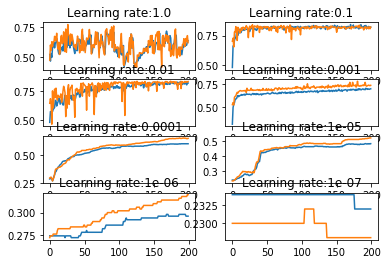

In [97]:
X_train, X_test, y_train, y_test=prepare_data()
learning_rates=[1E-0,1E-1,1E-2,1E-3,1E-4,1E-5,1E-6,1E-7]
for i in range(len(learning_rates)):
    plt.subplot(420+i+1)
    fit_model(X_train, X_test, y_train, y_test,learning_rates[i])
plt.show()

In [98]:
import pandas as pd

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
numpy.random.seed(seed)

In [101]:
dataframe=pd.read_csv('ionosphere.csv',header=None)

In [102]:
dataset=dataframe.values

In [103]:
X=dataset[:,0:34].astype(float)
y=dataset[:,34]

In [104]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [105]:
model=Sequential()
model.add(Dense(34,input_dim=34,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))

In [106]:
epochs=50
learning_rate=0.1
decay_rate=learning_rate/epochs
momentum=0.8

In [107]:
sgd=SGD(learning_rate=learning_rate,momentum=momentum,decay=decay_rate,nesterov=False)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [108]:
model.fit(X,y,validation_split=0.33,epochs=epochs,batch_size=28)

Epoch 1/50
9/9 [==============================] - 1s 27ms/step - loss: 0.6940 - accuracy: 0.4340 - val_loss: 0.6628 - val_accuracy: 0.9655
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 0.6655 - accuracy: 0.7532 - val_loss: 0.5941 - val_accuracy: 0.9310
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6090 - accuracy: 0.8043 - val_loss: 0.5621 - val_accuracy: 0.8362
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5298 - accuracy: 0.7830 - val_loss: 0.3744 - val_accuracy: 0.9483
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4346 - accuracy: 0.8255 - val_loss: 0.3184 - val_accuracy: 0.9483
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3433 - accuracy: 0.8851 - val_loss: 0.3056 - val_accuracy: 0.9224
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.2911 - accuracy: 0.8936 - val_loss: 0.1971 - val_accuracy: 0.9569
Epoch 8/50
9/9 [=================

In [109]:
import math
def step_decay(epoch):
    initial_lrate=0.1
    drop=0.5
    epochs_drop=30
    lrate=initial_lrate*math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

In [127]:
model=Sequential()
model.add(Dense(34,input_dim=34,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))

In [128]:
sgd=SGD(learning_rate=0,momentum=0.9,decay=0,nesterov=False)

In [133]:
from keras.callbacks import LearningRateScheduler
lrate=LearningRateScheduler(step_decay)
sgd=SGD(learning_rate=0.1,momentum=0.9,decay=0,nesterov=False)
callbacks_list=[lrate]

In [134]:
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [135]:
model.fit(X,y,validation_split=0.33,epochs=50,callbacks=callbacks_list)

Epoch 1/50
8/8 [==============================] - 1s 29ms/step - loss: 0.6806 - accuracy: 0.6936 - val_loss: 0.6310 - val_accuracy: 0.9397
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6220 - accuracy: 0.8128 - val_loss: 0.4516 - val_accuracy: 0.9483
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5064 - accuracy: 0.8255 - val_loss: 0.4922 - val_accuracy: 0.8966
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3810 - accuracy: 0.8766 - val_loss: 0.1812 - val_accuracy: 0.9655
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.3170 - accuracy: 0.8894 - val_loss: 0.2609 - val_accuracy: 0.9224
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2275 - accuracy: 0.9149 - val_loss: 0.2021 - val_accuracy: 0.9310
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.2161 - accuracy: 0.9191 - val_loss: 0.1199 - val_accuracy: 0.9655
Epoch 8/50
8/8 [============

In [137]:
from keras.datasets import mnist

In [146]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

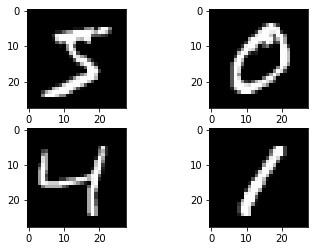

In [140]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [141]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [142]:
seed=7
numpy.random.seed(seed)

In [147]:
num_pixels=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test=X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

In [148]:
X_train=X_train/255
X_test=X_test/255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

In [149]:
model=Sequential()
model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))
model.add(Dense(num_classes,kernel_initializer='normal',activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [150]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200)

Epoch 1/10
300/300 [==============================] - 5s 16ms/step - loss: 0.2784 - accuracy: 0.9215 - val_loss: 0.1380 - val_accuracy: 0.9607
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 0.1092 - accuracy: 0.9685 - val_loss: 0.0935 - val_accuracy: 0.9720
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0703 - accuracy: 0.9799 - val_loss: 0.0787 - val_accuracy: 0.9759
Epoch 4/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0491 - accuracy: 0.9862 - val_loss: 0.0758 - val_accuracy: 0.9763
Epoch 5/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0351 - accuracy: 0.9903 - val_loss: 0.0597 - val_accuracy: 0.9804
Epoch 6/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0256 - accuracy: 0.9931 - val_loss: 0.0588 - val_accuracy: 0.9805
Epoch 7/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0187 - accuracy: 0.9956 - val_loss: 0.0649 - val_accuracy: 0.9786

In [161]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [157]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [153]:
X_train.shape

(60000, 28, 28)

In [154]:
y_train.shape

(60000,)

In [158]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [159]:
X_train=X_train/255
X_test=X_test/255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

In [165]:
def baseline_model():
    model=Sequential()
    model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [166]:
model=baseline_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200)

Epoch 1/10
300/300 [==============================] - 32s 104ms/step - loss: 0.2390 - accuracy: 0.9328 - val_loss: 0.0786 - val_accuracy: 0.9762
Epoch 2/10
300/300 [==============================] - 27s 90ms/step - loss: 0.0724 - accuracy: 0.9785 - val_loss: 0.0516 - val_accuracy: 0.9826
Epoch 3/10
300/300 [==============================] - 27s 89ms/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.0433 - val_accuracy: 0.9853
Epoch 4/10
300/300 [==============================] - 28s 93ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0373 - val_accuracy: 0.9872
Epoch 5/10
300/300 [==============================] - 26s 87ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 6/10
300/300 [==============================] - 26s 87ms/step - loss: 0.0267 - accuracy: 0.9919 - val_loss: 0.0386 - val_accuracy: 0.9869
Epoch 7/10
300/300 [==============================] - 26s 87ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0353 - val_accuracy

In [167]:
def larger_model():
    model=Sequential()
    model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15,(3,3),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model 

In [168]:
model=larger_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200)

Epoch 1/10
300/300 [==============================] - 54s 176ms/step - loss: 0.3830 - accuracy: 0.8821 - val_loss: 0.0816 - val_accuracy: 0.9738
Epoch 2/10
300/300 [==============================] - 56s 185ms/step - loss: 0.0971 - accuracy: 0.9702 - val_loss: 0.0493 - val_accuracy: 0.9844
Epoch 3/10
300/300 [==============================] - 38s 126ms/step - loss: 0.0707 - accuracy: 0.9787 - val_loss: 0.0372 - val_accuracy: 0.9873
Epoch 4/10
300/300 [==============================] - 41s 136ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0338 - val_accuracy: 0.9880
Epoch 5/10
300/300 [==============================] - 45s 152ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0331 - val_accuracy: 0.9892
Epoch 6/10
300/300 [==============================] - 41s 137ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0288 - val_accuracy: 0.9909
Epoch 7/10
300/300 [==============================] - 39s 130ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0283 - val_ac

In [169]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [170]:
X_test.shape

(10000, 28, 28)

In [171]:
X_train=X_train.reshape(X_train.shape[0],1,28,28)
X_test=X_test.reshape(X_test.shape[0],1,28,28)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [172]:
from keras.preprocessing.image import ImageDataGenerator

In [173]:
datagen=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

In [174]:
datagen.fit(X_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


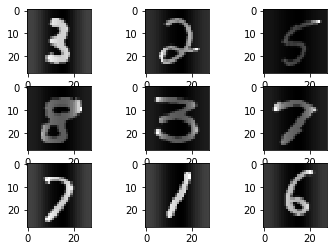

In [176]:
for X_batch,y_batch in datagen.flow(X_train,y_train,batch_size=9):
    
    for i in range(9):
        plt.subplot(330+i+1)
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [177]:
datagen=ImageDataGenerator(zca_whitening=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [178]:
datagen.fit(X_train)

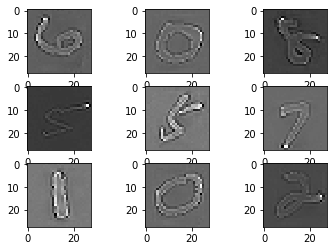

In [179]:
for X_batch,y_batch in datagen.flow(X_train,y_train,batch_size=9):
    
    for i in range(9):
        plt.subplot(330+i+1)
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [180]:
datagen=ImageDataGenerator(rotation_range=90)

In [181]:
datagen.fit(X_train)

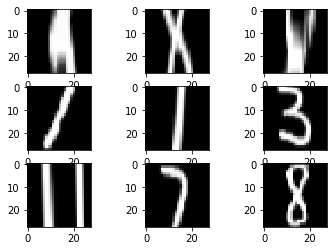

In [182]:
for X_batch,y_batch in datagen.flow(X_train,y_train,batch_size=9):
    
    for i in range(9):
        plt.subplot(330+i+1)
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [183]:
shift=0.2
datagen=ImageDataGenerator(width_shift_range=shift,height_shift_range=shift)

In [184]:
datagen.fit(X_train)

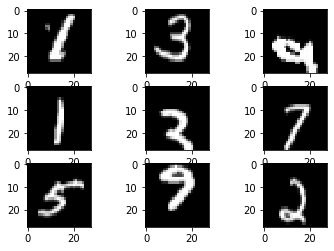

In [185]:
for X_batch,y_batch in datagen.flow(X_train,y_train,batch_size=9):
    
    for i in range(9):
        plt.subplot(330+i+1)
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [186]:
datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True)

In [187]:
datagen.fit(X_train)

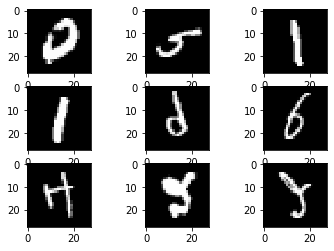

In [188]:
for X_batch,y_batch in datagen.flow(X_train,y_train,batch_size=9):
    
    for i in range(9):
        plt.subplot(330+i+1)
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [189]:
import tensorflow as tf

In [190]:
from tensorflow.keras import datasets,layers,models

In [191]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 101s 1us/step


In [192]:
train_images,test_images=train_images/255.0,test_images/255.0

In [193]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

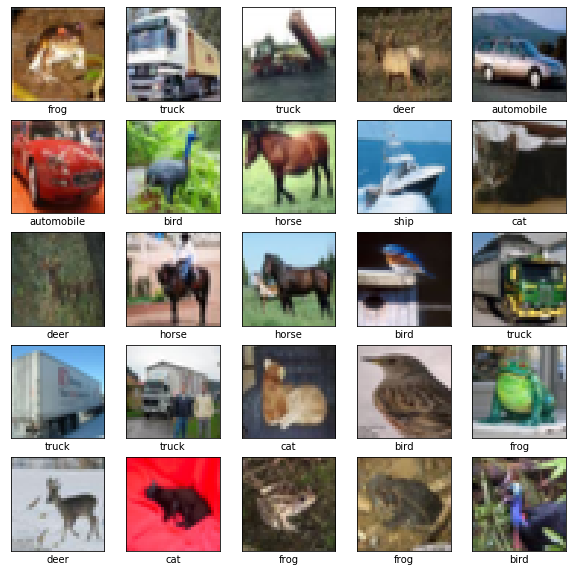

In [194]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [196]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))

In [197]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10))

In [199]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)              

In [201]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [202]:
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.4910 - accuracy: 0.4568 - val_loss: 1.2319 - val_accuracy: 0.5524
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1355 - accuracy: 0.5985 - val_loss: 1.0600 - val_accuracy: 0.6220
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9879 - accuracy: 0.6523 - val_loss: 0.9622 - val_accuracy: 0.6660
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8923 - accuracy: 0.6866 - val_loss: 0.9241 - val_accuracy: 0.6785
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8202 - accuracy: 0.7134 - val_loss: 0.9375 - val_accuracy: 0.6748
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7611 - accuracy: 0.7333 - val_loss: 0.8523 - val_accuracy: 0.7041
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7091 - accuracy: 0.7521 - val_loss: 0.8549 -

In [203]:
import numpy as np

In [204]:
from keras.datasets import imdb

In [205]:
(X_train,y_train),(X_test,y_test)=imdb.load_data()

17465344/17464789 [==============================] - 6s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differen

In [206]:
x=np.concatenate((X_train,X_test),axis=0)
y=np.concatenate((y_train,y_test),axis=0)

In [208]:
print('Training data:')
print(x.shape)
print(y.shape)

Training data:
(50000,)
(50000,)


In [209]:
print('Classes:')
np.unique(y)

Classes:


array([0, 1])

In [210]:
print('Number of words:')
print(len(np.unique(np.hstack(x))))

Number of words:
88585


In [211]:
print('Review length:')
result=[len(a) for a in x]
print('Mean %.2f words (%f)'%(np.mean(result),np.std(result)))

Review length:
Mean 234.76 words (172.911495)


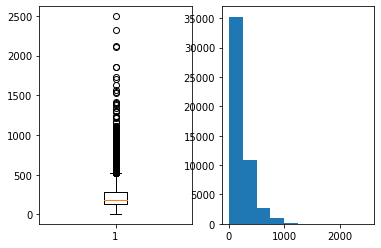

In [213]:
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

In [214]:
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [215]:
seed=7
np.random.seed(seed)

In [217]:
top_words=5000
(X_train,y_train),(X_test,y_test)=imdb.load_data(nb_words=top_words)
max_words=500

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differen

AttributeError: module 'tensorflow.keras.preprocessing.sequence' has no attribute 'pad'

In [218]:
X_train=sequence.pad_sequences(X_train,maxlen=max_words)
X_test=sequence.pad_sequences(X_test,maxlen=max_words)

In [219]:
model=Sequential()
model.add(Embedding(top_words,32,input_length=max_words))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [220]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_62 (Dense)             (None, 250)               4000250   
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


In [222]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=128)

Epoch 1/2
196/196 [==============================] - 20s 93ms/step - loss: 0.4766 - accuracy: 0.7530 - val_loss: 0.2984 - val_accuracy: 0.8718
Epoch 2/2
196/196 [==============================] - 18s 91ms/step - loss: 0.1789 - accuracy: 0.9324 - val_loss: 0.3055 - val_accuracy: 0.8729


In [223]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.3055 - accuracy: 0.8729


[0.30547621846199036, 0.8728799819946289]

In [224]:
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D

In [228]:
model=Sequential()
model.add(Embedding(top_words,32,input_length=max_words))
model.add(Convolution1D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [229]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 498, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 249, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7968)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 250)               1992250   
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 251       
Total params: 2,155,605
Trainable params: 2,155,605
Non-trainable params: 0
___________________________________________

In [230]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=128)

Epoch 1/2
196/196 [==============================] - 29s 139ms/step - loss: 0.4799 - accuracy: 0.7334 - val_loss: 0.2821 - val_accuracy: 0.8838
Epoch 2/2
196/196 [==============================] - 26s 135ms/step - loss: 0.2278 - accuracy: 0.9103 - val_loss: 0.2785 - val_accuracy: 0.8834


In [231]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.2785 - accuracy: 0.8834


[0.278495728969574, 0.8833600282669067]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
dataset=pd.read_csv('international-airline-passengers.csv',usecols=[1],engine='python')

In [10]:
dataset

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


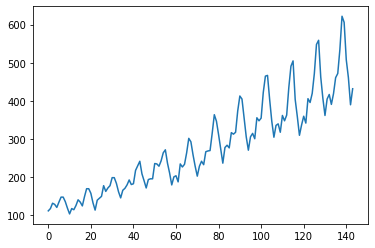

In [11]:
plt.plot(dataset)
plt.show()

In [2]:
import numpy as np
import math

In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Dense

In [8]:
np.random.seed(7)

In [50]:
dataset=dataset.values

In [51]:
dataset=dataset.astype('float32')

In [33]:
train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train),len(test))

96 48


In [14]:
def create_dataset(dataset,lookback=1):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-lookback):
        a=dataset[i:(i+lookback),0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX),np.array(dataY)

In [34]:
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)
trainX.shape,trainY.shape

((95, 1), (95,))

In [36]:
model=Sequential()
model.add(Dense(8,input_dim=look_back,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.fit(trainX,trainY,epochs=200,batch_size=2)

Epoch 1/200
48/48 [==============================] - 1s 2ms/step - loss: 30166.5820
Epoch 2/200
48/48 [==============================] - 0s 2ms/step - loss: 22121.4219
Epoch 3/200
48/48 [==============================] - 0s 2ms/step - loss: 15380.4775
Epoch 4/200
48/48 [==============================] - 0s 2ms/step - loss: 10183.5029
Epoch 5/200
48/48 [==============================] - 0s 2ms/step - loss: 6387.7100
Epoch 6/200
48/48 [==============================] - 0s 2ms/step - loss: 3809.6555
Epoch 7/200
48/48 [==============================] - 0s 2ms/step - loss: 2215.4060
Epoch 8/200
48/48 [==============================] - 0s 3ms/step - loss: 1333.3907
Epoch 9/200
48/48 [==============================] - 0s 2ms/step - loss: 879.8809
Epoch 10/200
48/48 [==============================] - 0s 2ms/step - loss: 680.5668
Epoch 11/200
48/48 [==============================] - 0s 3ms/step - loss: 592.1114
Epoch 12/200
48/48 [==============================] - 0s 2ms/step - loss: 559.0778
E

48/48 [==============================] - 0s 2ms/step - loss: 552.4247
Epoch 197/200
48/48 [==============================] - 0s 2ms/step - loss: 557.1766
Epoch 198/200
48/48 [==============================] - 0s 3ms/step - loss: 545.3613
Epoch 199/200
48/48 [==============================] - 0s 2ms/step - loss: 543.5676
Epoch 200/200
48/48 [==============================] - 0s 2ms/step - loss: 546.1442


In [38]:
trainscore=model.evaluate(trainX,trainY)

3/3 [==============================] - 0s 4ms/step - loss: 538.7659


In [39]:
trainscore,math.sqrt(trainscore)

(538.765869140625, 23.211330619777595)

In [40]:
testscore=model.evaluate(testX,testY)

2/2 [==============================] - 0s 4ms/step - loss: 2342.8186


In [41]:
testscore,math.sqrt(testscore)

(2342.818603515625, 48.40267145019606)

In [42]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

In [43]:
trainPredict.shape

(95, 1)

In [33]:
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:look_back+len(trainPredict),:]=trainPredict

In [44]:
testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+2*look_back:len(dataset),:]=testPredict

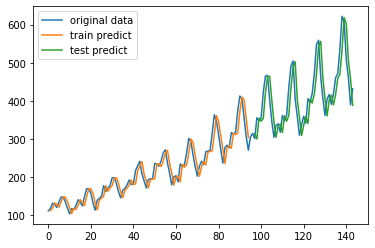

In [48]:
plt.plot(dataset,label='original data')
plt.plot(trainPredictPlot,label='train predict')
plt.plot(testPredictPlot,label='test predict')
plt.legend()
plt.show()

In [49]:
look_back=3
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [50]:
model=Sequential()
model.add(Dense(8,input_dim=look_back,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [51]:
model.fit(trainX,trainY,epochs=200,batch_size=2)

Epoch 1/200
47/47 [==============================] - 1s 2ms/step - loss: 4916.3467
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 1091.8849
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 1001.0833
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 938.5830
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 932.3018
Epoch 6/200
47/47 [==============================] - 0s 1ms/step - loss: 933.1971
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 923.3082
Epoch 8/200
47/47 [==============================] - 0s 2ms/step - loss: 932.3481
Epoch 9/200
47/47 [==============================] - 0s 3ms/step - loss: 904.8065
Epoch 10/200
47/47 [==============================] - 0s 2ms/step - loss: 908.1116
Epoch 11/200
47/47 [==============================] - 0s 2ms/step - loss: 894.0593
Epoch 12/200
47/47 [==============================] - 0s 3ms/step - loss: 893.5114
Epoch 13/2

Epoch 99/200
47/47 [==============================] - 0s 2ms/step - loss: 587.9197
Epoch 100/200
47/47 [==============================] - 0s 1ms/step - loss: 598.2476
Epoch 101/200
47/47 [==============================] - 0s 3ms/step - loss: 545.8831
Epoch 102/200
47/47 [==============================] - 0s 2ms/step - loss: 639.4139
Epoch 103/200
47/47 [==============================] - 0s 2ms/step - loss: 597.8297
Epoch 104/200
47/47 [==============================] - 0s 2ms/step - loss: 577.0488
Epoch 105/200
47/47 [==============================] - 0s 1ms/step - loss: 577.5964
Epoch 106/200
47/47 [==============================] - 0s 2ms/step - loss: 593.7767
Epoch 107/200
47/47 [==============================] - 0s 3ms/step - loss: 582.6070
Epoch 108/200
47/47 [==============================] - 0s 3ms/step - loss: 581.1516
Epoch 109/200
47/47 [==============================] - 0s 2ms/step - loss: 557.8463
Epoch 110/200
47/47 [==============================] - 0s 2ms/step - loss: 56

In [52]:
trainscore=model.evaluate(trainX,trainY)

3/3 [==============================] - 0s 2ms/step - loss: 492.7159


In [53]:
trainscore,math.sqrt(trainscore)

(492.71588134765625, 22.19720435882988)

In [54]:
testscore=model.evaluate(testX,testY)

2/2 [==============================] - 0s 3ms/step - loss: 1972.2335


In [55]:
testscore,math.sqrt(testscore)

(1972.2335205078125, 44.40983585319599)

In [56]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

In [57]:
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:look_back+len(trainPredict),:]=trainPredict

In [58]:
testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+2*look_back:len(dataset),:]=testPredict

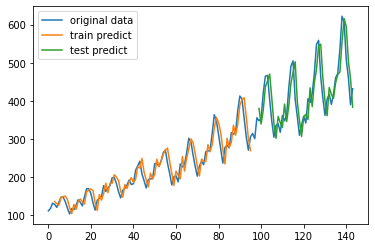

In [59]:
plt.plot(dataset,label='original data')
plt.plot(trainPredictPlot,label='train predict')
plt.plot(testPredictPlot,label='test predict')
plt.legend()
plt.show()

In [5]:
from keras.layers import LSTM

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [62]:
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [52]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [64]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [53]:
train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train),len(test))

96 48


In [15]:
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [16]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [17]:
model=Sequential()
model.add(LSTM(4,input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.fit(trainX,trainY,epochs=100,batch_size=1)

Epoch 1/100
95/95 [==============================] - 24s 4ms/step - loss: 0.0800
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0409
Epoch 3/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 4/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 5/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 7/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 8/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 9/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 10/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 11/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 12/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 13/100
95/95 [================

In [19]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

In [20]:
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

In [21]:
trainY.shape

(1, 95)

In [22]:
trainPredict.shape

(95, 1)

In [23]:
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))

In [24]:
testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))

In [25]:
trainScore,testScore

(22.86403073495526, 48.97460461092382)

In [26]:
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:look_back+len(trainPredict),:]=trainPredict

In [27]:
testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+2*look_back:len(dataset),:]=testPredict

In [28]:
dataset=scaler.inverse_transform(dataset)

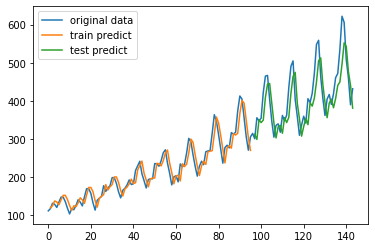

In [29]:
plt.plot(dataset,label='original data')
plt.plot(trainPredictPlot,label='train predict')
plt.plot(testPredictPlot,label='test predict')
plt.legend()
plt.show()

In [54]:
look_back=3
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [55]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [44]:
model=Sequential()
model.add(LSTM(4,input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
model.fit(trainX,trainY,epochs=100,batch_size=1)

Epoch 1/100
93/93 [==============================] - 3s 4ms/step - loss: 0.1234
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.0308
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.0312
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.0366
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 0.0263
Epoch 7/100
93/93 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 8/100
93/93 [==============================] - 0s 4ms/step - loss: 0.0232
Epoch 9/100
93/93 [==============================] - 0s 4ms/step - loss: 0.0222
Epoch 10/100
93/93 [==============================] - 0s 4ms/step - loss: 0.0211
Epoch 11/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0200
Epoch 12/100
93/93 [==============================] - 1s 5ms/step - loss: 0.0240
Epoch 13/100
93/93 [=================

trainscore:25.96,testscore:60.32


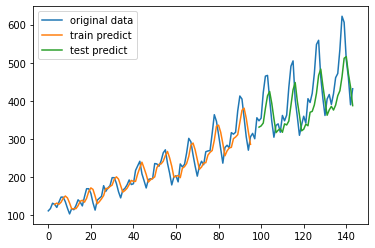

In [46]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('trainscore:%.2f,testscore:%.2f'%(trainScore,testScore))

trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:look_back+len(trainPredict),:]=trainPredict

testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+2*look_back:len(dataset),:]=testPredict

dataset=scaler.inverse_transform(dataset)

plt.plot(dataset,label='original data')
plt.plot(trainPredictPlot,label='train predict')
plt.plot(testPredictPlot,label='test predict')
plt.legend()
plt.show()

In [57]:
look_back=3
batch_size=1
model=Sequential()
#model.add(LSTM(4,batch_input_shape=(batch_size,look_back,1),stateful=True,return_sequences=True))
model.add(LSTM(4,batch_input_shape=(batch_size,look_back,1),stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
for i in range(100):
    model.fit(trainX,trainY,epochs=1,batch_size=batch_size,shuffle=False)
    model.reset_states

93/93 [==============================] - 0s 4ms/step - loss: 0.0019


In [59]:
trainPredict=model.predict(trainX,batch_size=batch_size)
model.reset_states()
testPredict=model.predict(testX,batch_size=batch_size)

trainscore:22.54,testscore:51.09


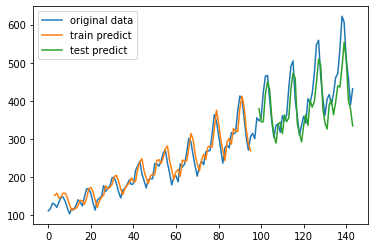

In [60]:
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('trainscore:%.2f,testscore:%.2f'%(trainScore,testScore))

trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:look_back+len(trainPredict),:]=trainPredict

testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+2*look_back:len(dataset),:]=testPredict

dataset=scaler.inverse_transform(dataset)

plt.plot(dataset,label='original data')
plt.plot(trainPredictPlot,label='train predict')
plt.plot(testPredictPlot,label='test predict')
plt.legend()
plt.show()

In [61]:
import numpy as np
from keras.datasets import imdb
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [63]:
np.random.seed(7)
top_words=5000
(X_train,y_train),(X_test,y_test)=imdb.load_data(nb_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 

In [64]:
max_review_length=500
X_train=sequence.pad_sequences(X_train,maxlen=max_review_length)
X_test=sequence.pad_sequences(X_test,maxlen=max_review_length)

In [67]:
embedding_vector_length=32
model=Sequential()
model.add(Embedding(top_words,embedding_vector_length,input_length=max_review_length))
model.add(Convolution1D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 498, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 249, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train,y_train,epochs=3,batch_size=64)

Epoch 1/3
391/391 [==============================] - 189s 467ms/step - loss: 0.5900 - accuracy: 0.6506
Epoch 2/3
391/391 [==============================] - 129s 331ms/step - loss: 0.2557 - accuracy: 0.9010
Epoch 3/3
391/391 [==============================] - 127s 324ms/step - loss: 0.1972 - accuracy: 0.9251


In [70]:
scores=model.evaluate(X_test,y_test)

782/782 [==============================] - 58s 72ms/step - loss: 0.2881 - accuracy: 0.8852


In [71]:
scores

[0.28812506794929504, 0.885200023651123]

In [72]:
from keras.layers import Dropout

In [75]:
embedding_vector_length=32
model=Sequential()
model.add(Embedding(top_words,embedding_vector_length,input_length=max_review_length))
#model.add(Convolution1D(filters=32,kernel_size=3,activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(X_train,y_train,epochs=3,batch_size=64)

Epoch 1/3
391/391 [==============================] - 265s 668ms/step - loss: 0.6400 - accuracy: 0.6304
Epoch 2/3
391/391 [==============================] - 229s 587ms/step - loss: 0.3792 - accuracy: 0.8358
Epoch 3/3
391/391 [==============================] - 225s 574ms/step - loss: 0.2795 - accuracy: 0.8871


In [78]:
scores=model.evaluate(X_test,y_test)

782/782 [==============================] - 97s 122ms/step - loss: 0.3252 - accuracy: 0.8703


In [83]:
embedding_vector_length=32
model=Sequential()
model.add(Embedding(top_words,embedding_vector_length,input_length=max_review_length))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
model.fit(X_train,y_train,epochs=3,batch_size=64)

Epoch 1/3
391/391 [==============================] - 472s 1s/step - loss: 0.6511 - accuracy: 0.5994
Epoch 2/3
391/391 [==============================] - 468s 1s/step - loss: 0.3258 - accuracy: 0.8701
Epoch 3/3
391/391 [==============================] - 448s 1s/step - loss: 0.2653 - accuracy: 0.8957


In [85]:
scores=model.evaluate(X_test,y_test)

782/782 [==============================] - 117s 146ms/step - loss: 0.3056 - accuracy: 0.8668
